<h1 style="text-align: center;">[Daegu Apartement Predict Price]</h1>
<h3 style="text-align: center;">[Rachmawati Hapsari Putri]</h3>

---

## **Section 1. Business Understanding**

### **1.1 Context**<br>

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

Daegu, as one of South Korea's largest cities, has experienced rapid urbanization and economic growth, leading to a high demand for residential apartments. However, this demand is coupled with diverse factors that influence apartment prices. By leveraging machine learning, we aim to predict apartment prices accurately, providing value to both buyers and sellers in the Daegu real estate market.

### **1.2 Problem Statements**

**How to predict apartment sale prices to guide property investments and optimize real estate development strategies?**  


### **1.3 Goals**

To develop a model that predicts apartment sale prices by analyzing key factors such as size, year built, number of facilities, and nearby amenities. These predictions will help sellers set competitive and accurate prices, highlight valuable property features to attract buyers, and reduce the time properties stay on the market, ensuring maximum profit through informed, data-driven decisions.

### **1.4 Analytical Approach**

To address the problem, we will analyze the data to uncover patterns in the features that distinguish one apartment from another. By identifying the relationships between these features and the apartment prices, we aim to gain valuable insights into the key drivers of pricing.

Next, we will build a regression model to predict apartment prices. This predictive tool will assist sellers in setting competitive and market-aligned prices for their properties. It will also enable better decision-making by providing a clear understanding of the factors influencing apartment prices, ensuring sellers maximize revenue while attracting buyers.

### **1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**Business Metric**

- **Property Sale Revenue**:<br>
    Measures the total revenue generated from the sale of properties, which is the primary goal of the model. Accurate predictions of property prices directly contribute to maximizing revenue for sellers.


**Machine Learning Evaluation Metrics**

- **Mean Absolute Error (MAE)**:  
  MAE calculates the average of the absolute differences between the predicted and actual prices. It helps to understand the typical error size in predicting property prices. A lower MAE means the model's predictions are closer to the actual prices.

- **Root Mean Squared Error (RMSE)**:  
  RMSE gives more weight to larger errors than MAE, making it useful for identifying cases where the model's predictions are far off. It provides an overall measure of how spread out or varied the errors are. A smaller RMSE suggests more accurate predictions.

- **Mean Absolute Percentage Error (MAPE)**:  
  MAPE measures the average percentage difference between the predicted and actual prices. This is helpful for understanding the error relative to the actual price, and it makes it easier to compare accuracy across different price ranges. A lower MAPE indicates better prediction accuracy, especially for relative price accuracy.

- **R² (R-squared, Coefficient of Determination)**:  
  R² shows how well the model’s features (such as apartment size, location, and amenities) explain the variation in the target variable (property sale price). A higher R² means the model does a good job of capturing the factors that affect the sale price, making its predictions more reliable.

### **1.6 Success Criteria**

- Achieve MAE and RMSE values that are sufficiently low compared to the average apartment price range.
- Obtain a MAPE of less than 5-10% to ensure consistent relative accuracy across varying price levels.
- Obtain an R² value of at least 0.8, meaning the model explains 80% or more of the variance in apartment prices.

## **Section 2. Data Understanding**

### **2.1 General Information**

| Name                       | Description                              |
|----------------------------|------------------------------------------|
| Hallway Type               | Apartment type                          |
| TimeToSubway               | Time needed to the nearest subway station |
| SubwayStation              | The name of the nearest subway station  |
| N_FacilitiesNearBy(ETC)    | The number of facilities nearby         |
| N_FacilitiesNearBy(PublicOffice) | The number of public office facilities nearby |
| N_SchoolNearBy(University) | The number of universities nearby       |
| N_Parkinglot(Basement)     | The number of the parking lot           |
| YearBuilt                  | The year the apartment was built        |
| N_FacilitiesInApt          | Number of facilities in the apartment   |
| Size(sqft)                 | The apartment size (in square feet)     |
| SalePrice                  | The apartment price (Won)               |


### **2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
Hallway Type| Different apartment types often appeal to different buyers based on lifestyle, family size, or cultural preferences
TimeToSubway| Proximity to public transportation is a critical factor influencing convenience, demand, and value.
SubwayStation| The reputation and connectivity of a subway station (e.g., central, busy, or well-connected stations) can affect apartment desirability.
N_FacilitiesNearBy(ETC)| The availability of general facilities such as shops, restaurants, or parks enhances livability and demand.
N_FacilitiesNearBy(PublicOffice)| Proximity to government or administrative facilities improves convenience for residents who frequently access these services.
N_SchoolNearBy(University)| Proximity to universities increases demand from students, faculty, and investors looking for rental income
N_Parkinglot(Basement)| Adequate parking facilities significantly impact the convenience for car owners, particularly in urban areas where parking is limited.
YearBuilt| Newer apartments often have modern features and infrastructure, while older ones may need renovations, impacting desirability and pricing.
N_FacilitiesInApt| Facilities within the apartment complex (e.g., gyms, pools, security) increase convenience, lifestyle value, and overall attractiveness.
Size(sqft)| Apartment size is a fundamental factor influencing price. Larger apartments typically command higher values.

#### **Importing libraries & packages**

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn tools for model evaluation, preprocessing, and modeling
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    KFold, 
    StratifiedKFold, 
    RandomizedSearchCV, ``
    GridSearchCV
)
from sklearn.preprocessing import (
    OneHotEncoder, 
    RobustScaler, 
    StandardScaler, 
    KBinsDiscretizer
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Categorical encoders
import category_encoders as ce
from category_encoders import BinaryEncoder

# Outlier handling
from feature_engine.outliers import Winsorizer

# Suppress warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Check the Python version and ensure compatibility
print(f"Python version: {sys.version}")

SyntaxError: invalid syntax (1935653159.py, line 13)

#### **Import Dataset**

In [46]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**General Dataset Overview**

1. Dataset Size:
    - Rows: 4,123 (individual apartment records).
    - Columns: 11 (features related to apartment characteristics and price).

2. Memory Usage:
    - Approximately 354.4 KB, which is reasonable for analysis.

3. Data Types:
    - Object (categorical): 3 columns (HallwayType, TimeToSubway, SubwayStation).
    - Numeric (float64/int64): 8 columns.

### **2.3 Statistics Summary**

In [48]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [49]:
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [50]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

dgu = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 3. Data Cleaning**

### **3.1 Missing Values**

In [51]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

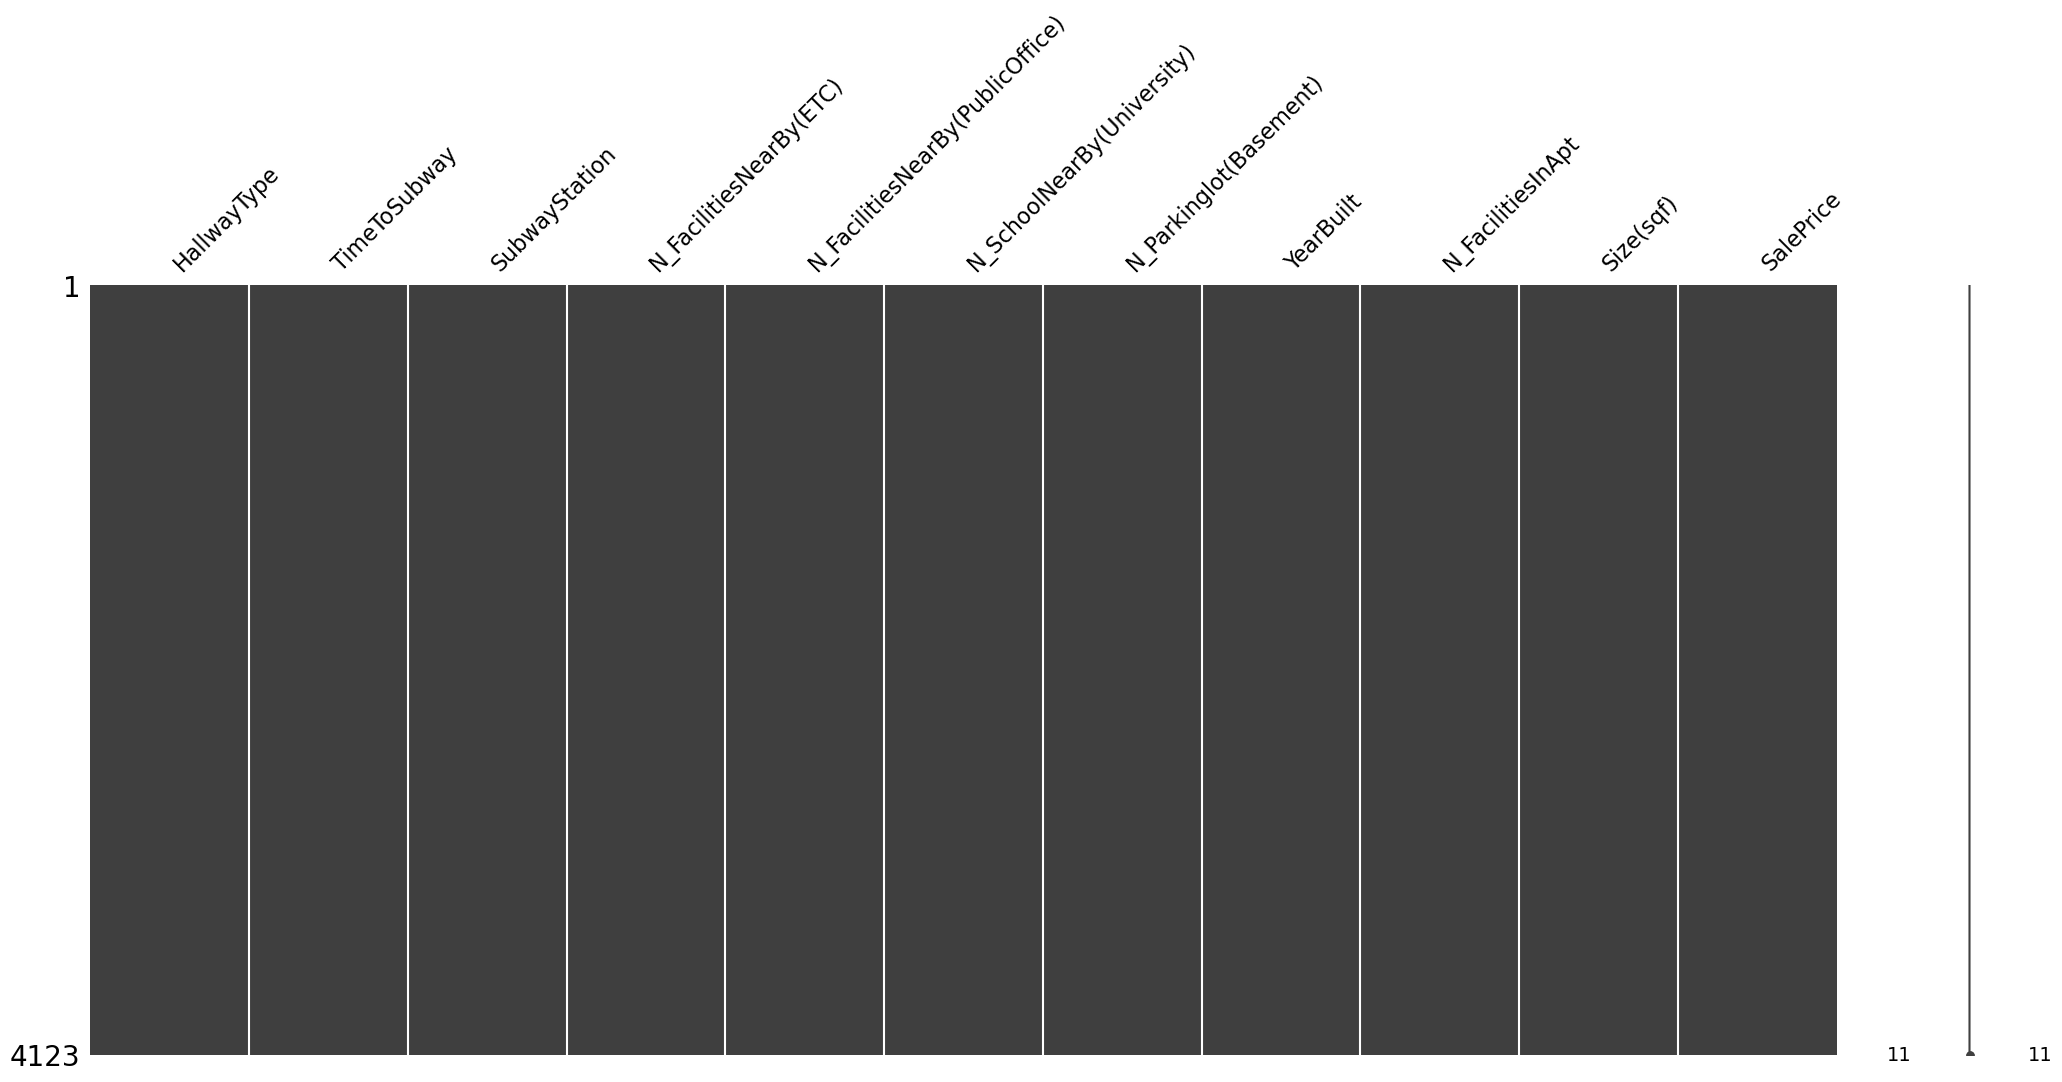

In [52]:
import missingno
missingno.matrix(df)

In [53]:
print(f'{(df.isnull().sum() / len(df)) * 100}')

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64


There is no Missing Values in this dataset

### **3.2 Duplicated Values**

In [54]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Unexpectedly, there is 1422 row of data duplicate in this dataset

In [55]:
df[(df['Size(sqf)'] == 910) & (df['SalePrice'] == 263345)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


To make sure the data duplicate, i try to see the size and price of one data, and turns out there is 6 duplicate of this data, so we need to remove it because the machine learning model is sensitive with duplicate data. 

In [56]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [57]:
df.shape

(2701, 11)

before droping duplicate there is 4,123 row, after droping it becomes 2701

### **3.3 Identify Spelling Errors**

In [58]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total Category on '{col}': {df[col].nunique()}")

Total Category on 'HallwayType': 3
Total Category on 'TimeToSubway': 5
Total Category on 'SubwayStation': 8


In [59]:
for column in categoric_features.columns:
    print(f"Unique values in {column}:")
    print(categoric_features[column].unique())
    print("-" * 50)

Unique values in HallwayType:
['terraced' 'mixed' 'corridor']
--------------------------------------------------
Unique values in TimeToSubway:
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
--------------------------------------------------
Unique values in SubwayStation:
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
--------------------------------------------------


No Spelling error in this dataset

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
numeric_features = df.select_dtypes(include='number')

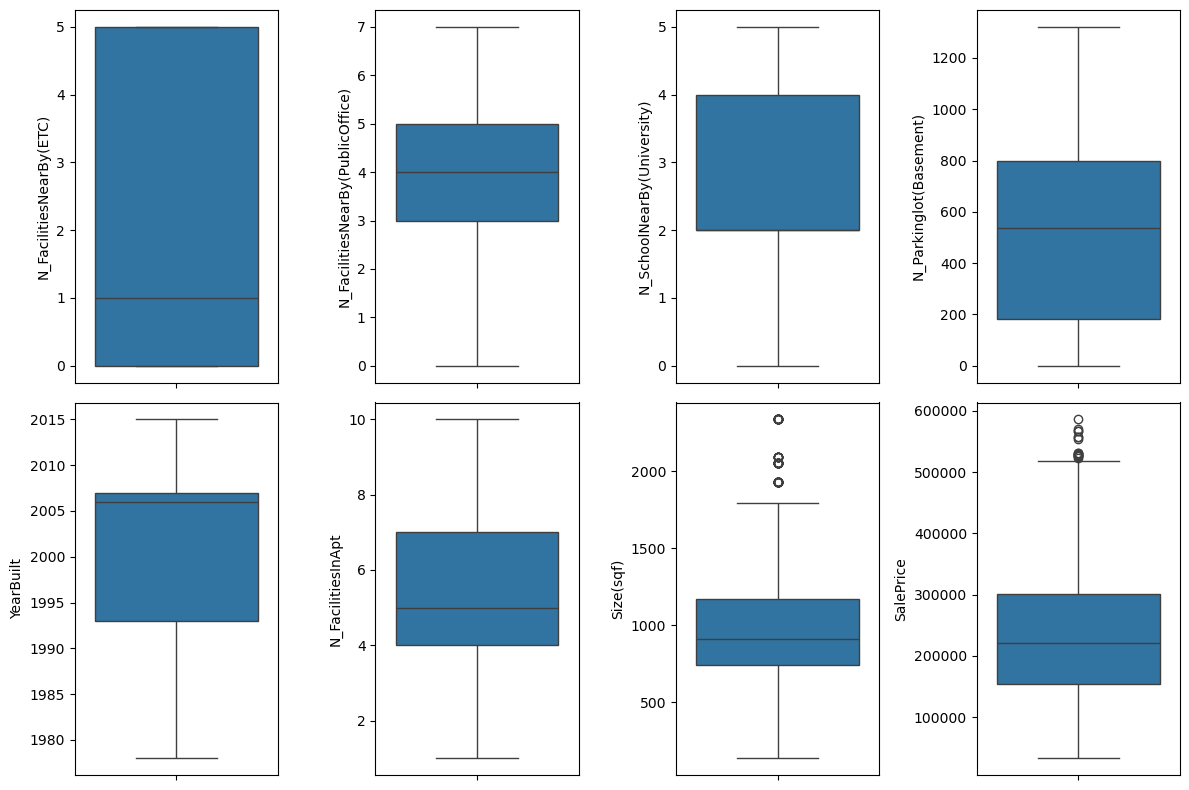

In [62]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is no anomaly in the categoric feature, but there is outlier in Size and Price Column

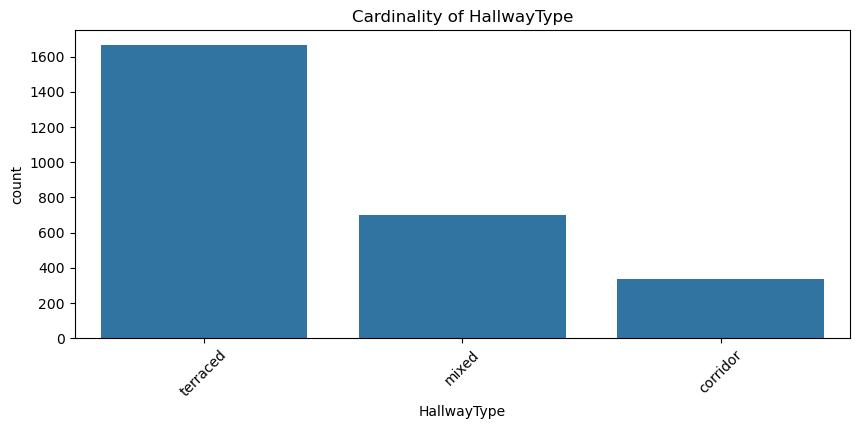

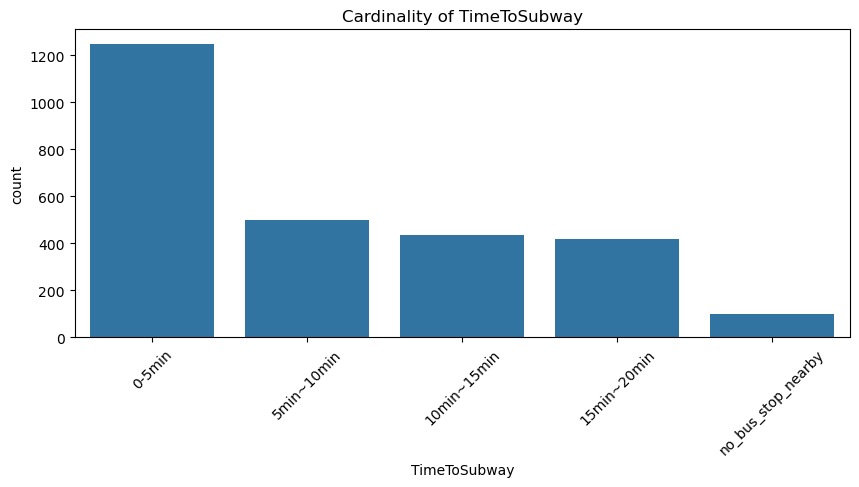

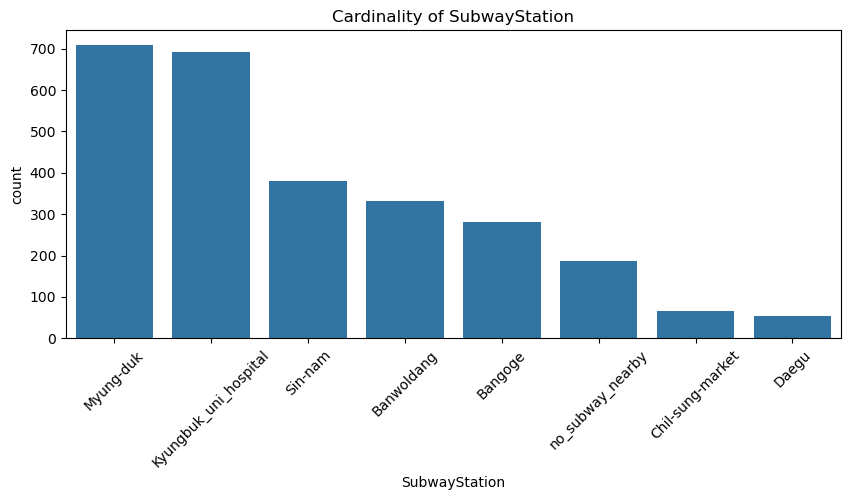

In [63]:
for col in categoric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Cardinality of {col}")
    plt.xticks(rotation=45)
    plt.show()

For categoric features, there is no anomaly data.

### **3.5 Identify Outlier Values**

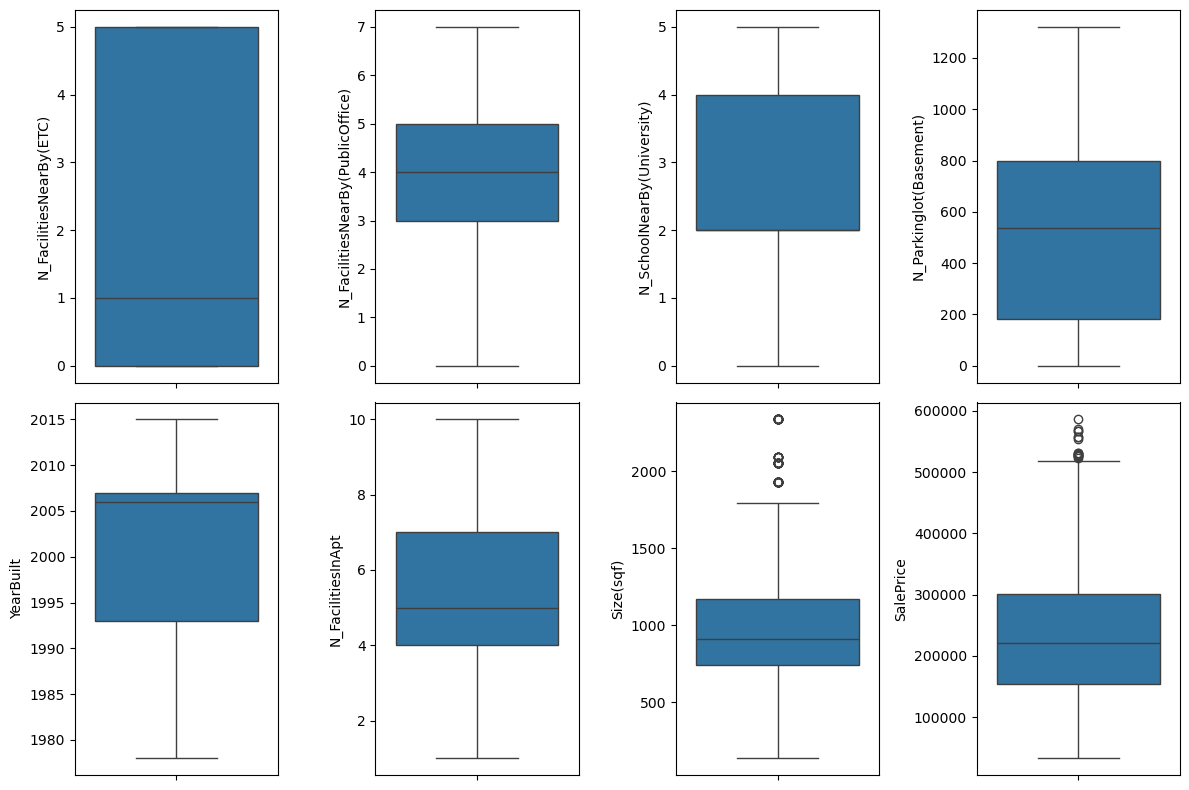

In [64]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is outlier in Size column and Sale Price

In [65]:
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower: {lower_limit}')
    print(f'upper: {upper_limit}') 
    
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [66]:
find_outlier(df['SalePrice'])

IQR: 147345.0
lower: -67478.5
upper: 521901.5
Number of outliers: 17
Percentage of outliers: 0.63%


- Outliers in SalePrice Are Minimal:<br>
    - Only 0.63% of the data are considered outliers, meaning the dataset is largely consistent in terms of apartment prices.<br>
    - These outliers may represent high-end luxury apartments or special cases (e.g., premium locations or larger-than-average units).

In [67]:
find_outlier(df['Size(sqf)'])

IQR: 424.0
lower: 107.0
upper: 1803.0
Number of outliers: 84
Percentage of outliers: 3.11%


- Outliers:
    - Count: 84 apartments exceed the upper bound (1,803.0 sq. ft.).
    - Percentage: Outliers account for 3.11% of the dataset (84 out of 4,123 records).

#### VIF 

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return pd.DataFrame(dict(feature=X.columns, VIF=vif_values))

In [69]:
vif_result = vif(numeric_features.drop('SalePrice', axis=1))
vif_result

,feature,VIF
0,N_FacilitiesNearBy(ETC),5.975305
1,N_FacilitiesNearBy(PublicOffice),13.896514
2,N_SchoolNearBy(University),16.257819
3,N_Parkinglot(Basement),11.266549
4,YearBuilt,30.259604
5,N_FacilitiesInApt,26.112948
6,Size(sqf),8.666827


In [70]:
n_mul = vif_result[vif_result['VIF'] > 10]
print(f"There are {len(n_mul)} of {len(vif_result)} features identified as having multicollinearity problems")

There are 5 of 7 features identified as having multicollinearity problems


In this analysis, multicollinearity is present among variables such as YearBuilt, N_FacilitiesInApt, and others, as indicated by their high VIF values. While multicollinearity can complicate the interpretation of coefficients in linear models, it does not inherently affect the predictive power of advanced machine learning models, such as Random Forest, XGBoost, and AdaBoost. These models are designed to handle correlated features effectively without requiring their removal. 

Additionally, each variable provides valuable information about apartment characteristics, such as size, amenities, and age, which are all crucial factors in determining selling prices in the real estate market of Daegu. Removing these variables could result in a loss of critical insights that align with the business context. 

Therefore, considering the objective of this analysis is predictive modeling rather than strict interpretability, and the robustness of the chosen machine learning models against multicollinearity, I have chosen to retain all variables. This approach ensures the model captures the full range of influential factors affecting apartment prices while leveraging the strengths of models like XGBoost to handle multicollinearity effectively.

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [73]:
train, test = train_test_split(df_seen, test_size=0.2, random_state=42)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Distribution**

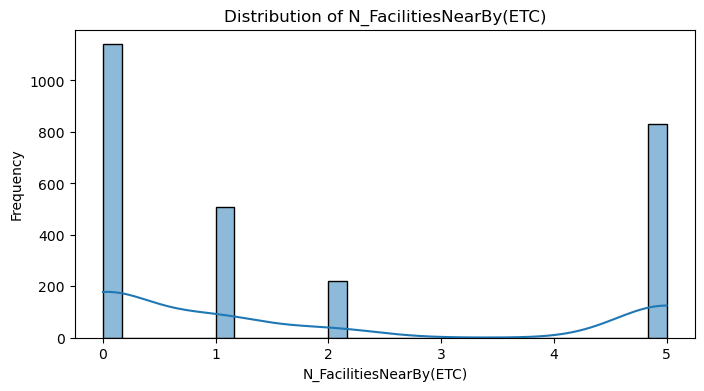

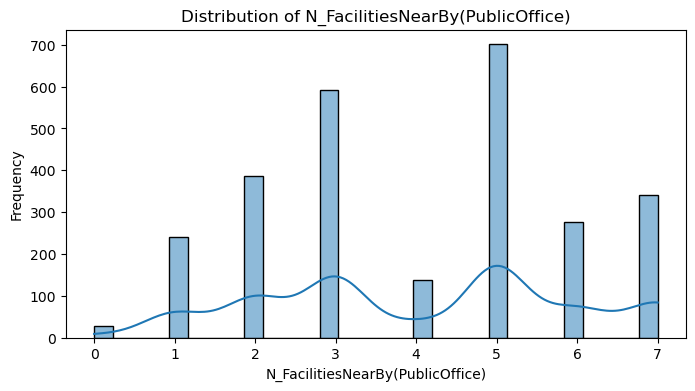

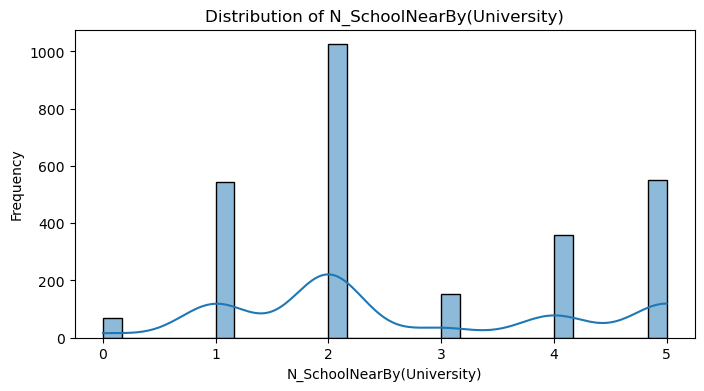

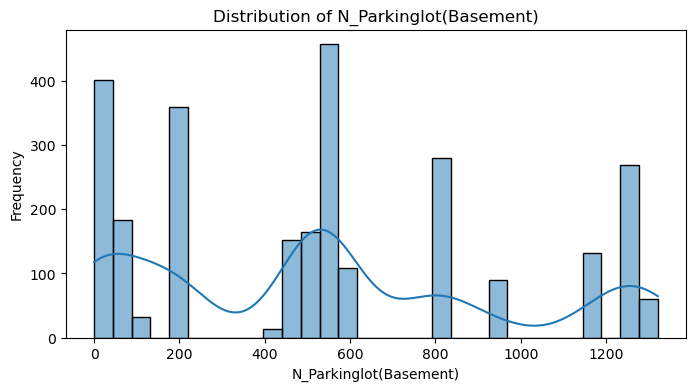

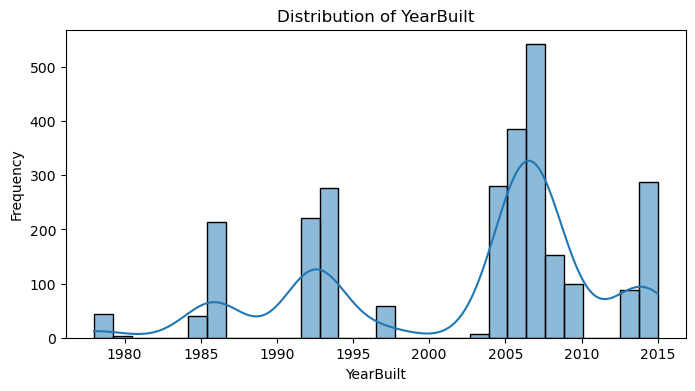

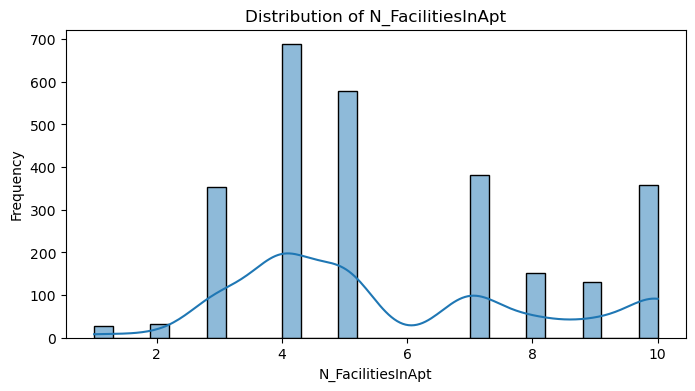

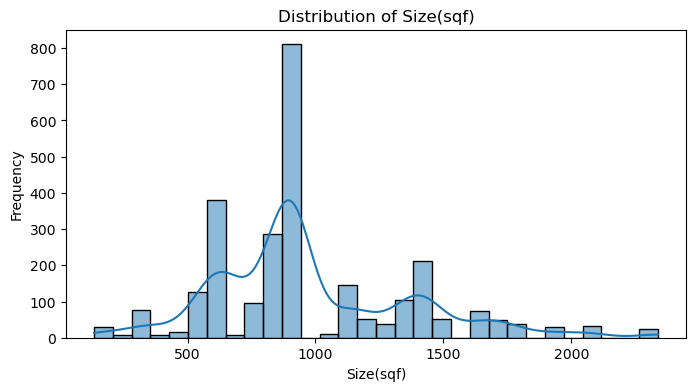

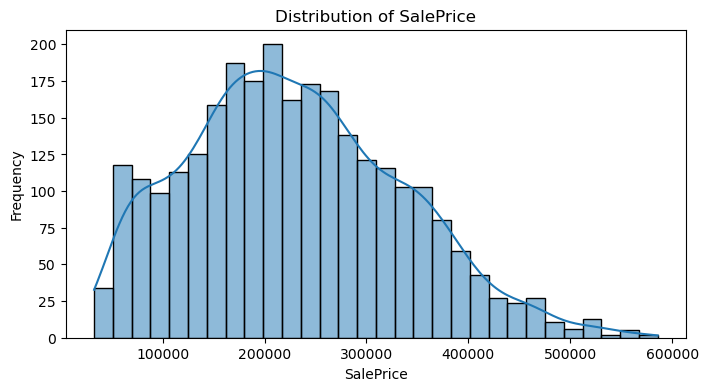

In [74]:
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [75]:
print(f"Total Apartement in Nearest Subway Station:\n{df['SubwayStation'].value_counts()}")
print(f"\nType of Hallway Apartment:\n{df['HallwayType'].value_counts()}")

Total Apartement in Nearest Subway Station:
SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

Type of Hallway Apartment:
HallwayType
terraced    1667
mixed        698
corridor     336
Name: count, dtype: int64


In [76]:
subway_type = (df.groupby(['SubwayStation', 'HallwayType'])['HallwayType']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
subway_time = (
    df.groupby(['SubwayStation', 'TimeToSubway'])['TimeToSubway']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

In [77]:
subway_time

,SubwayStation,TimeToSubway,Count
5,Kyungbuk_uni_hospital,0-5min,402
9,Myung-duk,15min~20min,353
10,Sin-nam,0-5min,333
1,Banwoldang,0-5min,301
6,Kyungbuk_uni_hospital,10min~15min,290
0,Bangoge,5min~10min,280
7,Myung-duk,0-5min,212
8,Myung-duk,10min~15min,144
13,no_subway_nearby,no_bus_stop_nearby,100
12,no_subway_nearby,5min~10min,88


In [78]:
subway_type

,SubwayStation,HallwayType,Count
7,Kyungbuk_uni_hospital,terraced,648
9,Myung-duk,mixed,353
12,Sin-nam,terraced,333
2,Banwoldang,terraced,301
0,Bangoge,mixed,280
10,Myung-duk,terraced,212
14,no_subway_nearby,terraced,160
8,Myung-duk,corridor,144
3,Chil-sung-market,mixed,65
11,Sin-nam,corridor,47


In [79]:
df_median_price = df.groupby(by=['SubwayStation']).agg({
    'SalePrice': 'median',  
    'Size(sqf)': ['median', 'count'] 
}).reset_index()

df_median_price.columns = ['SubwayStation', 'MedianSalePrice', 'MedianSize', 'ApartmentCount']
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('MedianSalePrice', ascending=False)

df_median_price

,MedianSalePrice,MedianSize,ApartmentCount
SubwayStation,,,
Banwoldang,295575.0,1366.0,333
Sin-nam,251327.0,914.0,380
Kyungbuk_uni_hospital,250884.5,910.0,692
no_subway_nearby,236725.5,910.0,188
Bangoge,179867.0,743.0,280
Myung-duk,165486.0,857.0,709
Daegu,93141.0,587.0,54
Chil-sung-market,92920.0,644.0,65


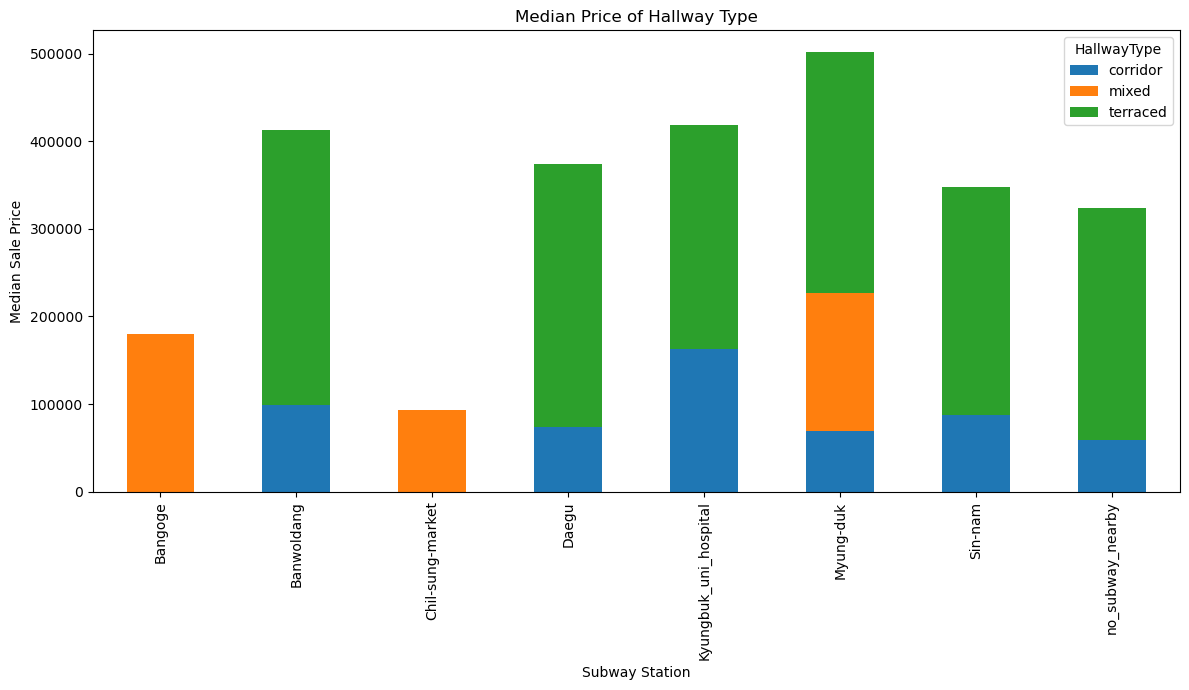

In [80]:
subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))

pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Price of Hallway Type')
plt.tight_layout() 
plt.show()

Insights:

Hallway Type Influence:<br>
    - Terrace houses generally command the highest median sale price across all subway stations. This suggests that properties with terraced hallways might be perceived as more desirable or luxurious.
    - Corridor type properties have the lowest median sale price in most locations, indicating they might be more affordable options.
    - Mixed hallway types fall somewhere in between, with their median prices varying depending on the specific subway station.

Subway Station Impact:<br>
    - Myung-duk stands out with the highest overall median sale price, regardless of the hallway type. This suggests that properties near this station are highly sought after, potentially due to factors like proximity to amenities, employment hubs, or better infrastructure.
    - Banwoldang and Kyungbuk_uni_hospital also show relatively high median prices, indicating their desirability as locations.
    - Chil-sung-market and no_subway_nearby areas have lower median prices across all hallway types, suggesting they might be less in-demand or have different market dynamics.


Potential Factors:<br>
The variation in median prices across different subway stations and hallway types could be influenced by factors such as:
1. Proximity to amenities: Closer proximity to schools, hospitals, shopping centers, and other conveniences could increase property values.
1. Accessibility: Areas with better public transportation, road networks, and walkability might be more desirable.
1. Development stage: Newer or more recently renovated properties might command higher prices.
1. Local economic conditions: The presence of employment opportunities, businesses, and a vibrant local economy can positively impact property values.

Text(0.5, 1.0, 'Hallway Type per Nearest Subway Station')

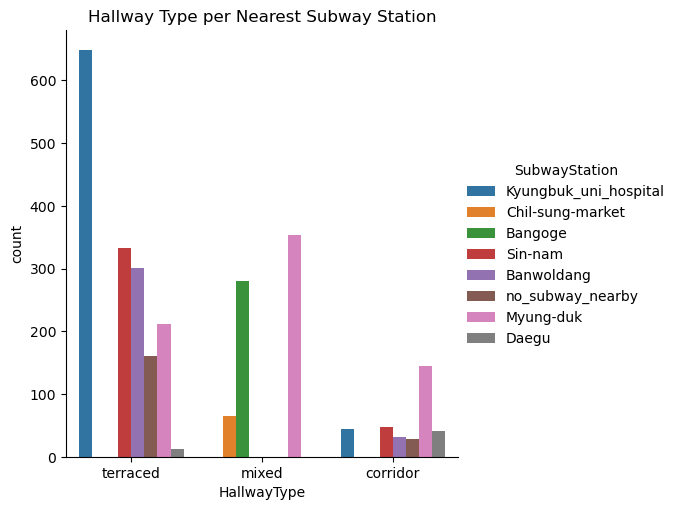

In [81]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df) 
plt.title('Hallway Type per Nearest Subway Station')

Key Observations:
1. Terrace Dominance: Terrace-type houses consistently have the highest median sale price, indicating their desirability in the market.
1. Corridor Affordability: Corridor-type properties tend to have lower median prices, suggesting they might be more budget-friendly options.
1. Mixed Variation: The median prices of mixed-type hallways vary depending on the specific subway station.
1. Subway Station Influence: The median sale price is significantly influenced by the subway station. Myung-duk stands out as the most expensive location, while Chil-sung-market and areas without nearby subways have lower prices.

**5.2 Correlation Analysis**

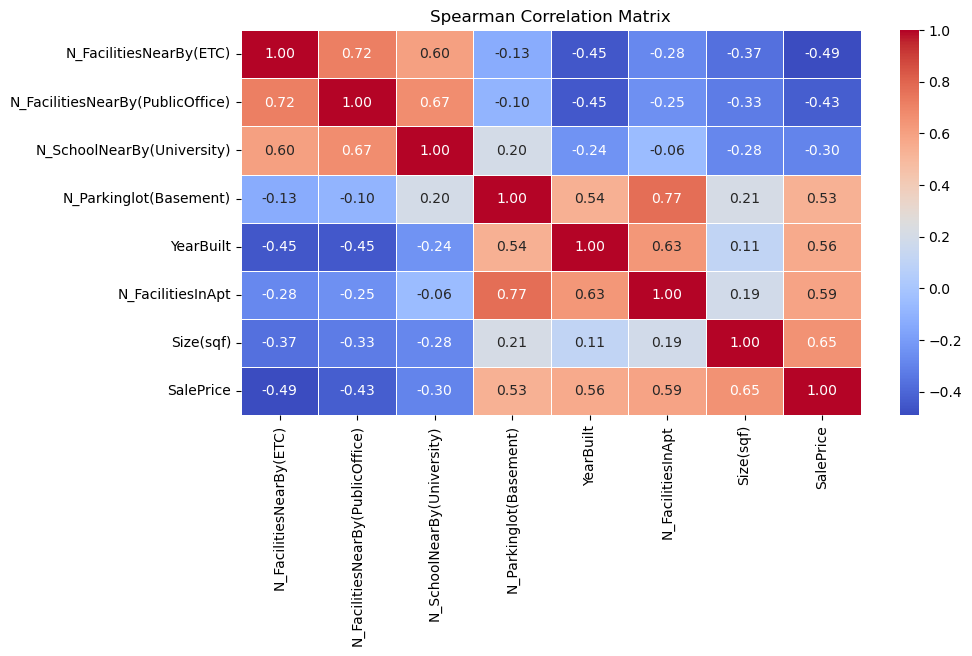

In [82]:
correlation_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

- Strong Positive Correlations:<br>
    SalePrice shows a strong positive correlation with:<br>
    - Size(sqf) (0.65): Larger apartments are associated with higher sale prices.
    - N_FacilitiesInApt (0.59): More facilities in an apartment complex increase its value.
    - YearBuilt (0.56): Newer buildings tend to have higher sale prices.
    - N_Parkinglot(Basement) and N_FacilitiesInApt (0.77): Apartments with basement parking lots tend to have more facilities.

- Negative Correlations:<br>
    SalePrice negatively correlates with:
    - N_FacilitiesNearBy(ETC) (-0.49): Apartments with many nearby facilities of type "ETC" tend to have lower sale prices.
    - N_FacilitiesNearBy(PublicOffice) (-0.43): The proximity to public offices seems to negatively influence prices.
    - YearBuilt and N_FacilitiesNearBy(ETC) (-0.45): Older apartments tend to be in areas with more general nearby facilities.

## **Section 6. Data Preparation**

1. Encoding with OneHotEncoder (OHE)
    - Purpose: Convert categorical variables into a format that can be used by machine learning algorithms (which often work better with numeric data).

    - Reason for OHE:
    Handle Nominal Data: Variables like HallwayType, TimeToSubway, and SubwayStation are nominal (no inherent order). OneHotEncoder creates binary columns for each category, ensuring the machine learning model doesn’t assume any ordinal relationship between the categories.

2. Winsorization
    - Purpose: Treat outliers in numerical data.
    - Reason for Winsorization:
        - Outliers: Variables like Size(sqf) may contain extreme values that can negatively affect the model's performance.
        - Methodology: Winsorization replaces extreme outliers (both tails) with less extreme values based on the interquartile range (IQR). This ensures that outliers do not overly influence the scaling or modeling process.
        - Fold of 1.5: Captures mild outliers without being too restrictive, balancing the need to clean data and retain variability.

3. RobustScaler
    - Purpose: Scale numerical data to reduce the impact of outliers.
    - Reason for RobustScaler:
        - Handles Outliers Better: Unlike standard scaling (which uses mean and standard deviation), RobustScaler uses the median and interquartile range, making it more robust to outliers.
        - Uniform Scaling: Ensures all features like YearBuilt, N_FacilitiesInApt, and N_FacilitiesNearBy are on a similar scale, which is critical for algorithms sensitive to feature magnitudes
4. Binning 
    - Purpose: The purpose of binning is to transform the continuous Size(sqf) variable into discrete intervals (bins) to simplify the data representation and help the model better capture patterns in the feature's relationship with the target variable.
    - Reasons for Binning:
        - Reduce Variability:
        Size(sqf) has high variability, and binning simplifies this feature by grouping values into intervals, making it easier for the model to process.

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [83]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [84]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
# Data Testing
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

print(X_train.shape)
print(y_train.shape)

(1728, 10)
(1728,)


**6.2 Data Transformation (Feature Engineering)**

In [85]:
numeric_feature = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include='object').columns

print("Numeric features:", numeric_feature)
print("Categorical features:", categorical_features)

Numeric features: Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')
Categorical features: Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')


In [86]:
categorical_pipeline = Pipeline([
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('Winsorization', Winsorizer(
        capping_method='iqr',  
        tail='both',          
        fold=1.5,             
        variables=['Size(sqf)']  
    )),
    ('RobustScaling', RobustScaler())
])

In [87]:
size_column = ['Size(sqf)']
other_numeric_feature = [col for col in numeric_feature if col != 'Size(sqf)']

size_pipeline = Pipeline([
    ('Winsorization', Winsorizer(
        capping_method='iqr',  
        tail='both',           
        fold=1.5,              
        variables=size_column  
    )),
    ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))
])

other_numeric_pipeline = Pipeline([
    ('Scaling', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'))
])

## **Section 7. Model Development**

### **7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [88]:
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread(r'C:\Users\user\Desktop\capstone 3\Daegu-Apartement-Price-Predict\assets\Implement New Model Flow Chart.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [89]:
import statsmodels.api as sm
feature_ols = numeric_features.drop('SalePrice', axis=1).columns
target_ols = 'SalePrice'
ols= sm.OLS(df_seen[target_ols], sm.add_constant(df_seen[feature_ols])).fit()

In [90]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     861.5
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:14:49   Log-Likelihood:                -26607.
No. Observations:                2160   AIC:                         5.323e+04
Df Residuals:                    2152   BIC:                         5.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### F-Test:
- **Simultaneous Test (Overall Model Significance)**:  
  The P-value of the F-statistic is 0.00, which is below the significance level of 0.05. This indicates that at least one of the predictors (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, etc.) significantly affects the apartment sale price (`SalePrice`). We have enough evidence to conclude that the overall model is statistically significant.

### Partial Test:
1. **Intercept (B0)**:  
   The P-value for B0 is below 0.05. The intercept represents the predicted sale price when all predictors are zero, which is not meaningful in the real estate context (e.g., an apartment with zero size, no facilities, etc.). However, the intercept is necessary for the mathematical formulation of the model.

2. **`N_FacilitiesNearBy(ETC) (B1)`**:  
   The P-value for B1 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby facilities (e.g., convenience stores) negatively affects the apartment price.

3. **`N_FacilitiesNearBy(PublicOffice) (B2)`**:  
   The P-value for B2 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby public offices positively affects the apartment price.

4. **`N_SchoolNearBy(University) (B3)`**:  
   The P-value for B3 is below 0.05. At a 5% significance level, we have enough evidence to conclude that the number of nearby universities negatively affects the apartment price.

5. **`N_Parkinglot(Basement) (B4)`**:  
   The P-value for B4 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in basement parking spaces positively affects the apartment price.

6. **`YearBuilt (B5)`**:  
   The P-value for B5 is below 0.05. At a 5% significance level, we have enough evidence to conclude that newer apartments (higher `YearBuilt`) positively affect the apartment price.

7. **`N_FacilitiesInApt (B6)`**:  
   The P-value for B6 is below 0.05. At a 5% significance level, we have enough evidence to conclude that more facilities within the apartment positively affect the apartment price.

8. **`Size(sqf) (B7)`**:  
   The P-value for B7 is below 0.05. At a 5% significance level, we have enough evidence to conclude that an increase in the size of the apartment positively affects its price.

### Parameter Estimates:
1. **Intercept (B0 = -6,272,000)**: This is not meaningful to interpret in the context of real estate, as it represents the predicted price for an apartment with all predictors set to zero.  
2. **`N_FacilitiesNearBy(ETC) (B1 = -3418.86)`**: For each additional nearby facility (e.g., convenience store), the apartment price decreases by $3,418.86, holding other variables constant.  
3. **`N_FacilitiesNearBy(PublicOffice) (B2 = 2911.38)`**: For each additional nearby public office, the apartment price increases by $2,911.38, holding other variables constant.  
4. **`N_SchoolNearBy(University) (B3 = -5816.26)`**: For each additional nearby university, the apartment price decreases by $5,816.26, holding other variables constant.  
5. **`N_Parkinglot(Basement) (B4 = 22.09)`**: For each additional basement parking space, the apartment price increases by $22.09, holding other variables constant.  
6. **`YearBuilt (B5 = 3138.18)`**: For each additional year (newer construction), the apartment price increases by $3,138.18, holding other variables constant.  
7. **`N_FacilitiesInApt (B6 = 9442.26)`**: For each additional facility within the apartment, the price increases by $9,442.26, holding other variables constant.  
8. **`Size(sqf) (B7 = 165.57)`**: For each additional square foot, the apartment price increases by $165.57, holding other variables constant.  

### Coefficient of Determination:
- **Adjusted R-Squared = 73.2%**: This model explains 73.2% of the variation in apartment prices.  
(*For example, adding variables like `N_FacilitiesInApt` improved the adjusted R-squared, indicating an enhanced model fit.*)


In [91]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)

1. LinearRegression:
    The simplest and most interpretable regression model. It assumes a linear relationship between the independent variables (features) and the dependent variable (target). The goal is to minimize the sum of squared residuals (errors).
- Pros:
    - Easy to interpret and implement.
    - Works well for problems where the relationship between features and the target is approximately linear.
- Cons:
    - Assumes linearity, which may not hold for complex data.
    - Sensitive to multicollinearity and outliers.

2.  KNeighborsRegressor: 
    A non-parametric, instance-based algorithm that predicts the target by averaging the values of the k nearest neighbors in feature space. Distance metrics like Euclidean distance are typically used to determine "nearness."
- Pros:
    - Simple and interpretable.
    - Captures non-linear relationships well.
- Cons:
    - Computationally expensive for large datasets.
    - Sensitive to the choice of k and the distance metric.

3. DecisionTreeRegressor:
    A tree-based model that splits the data recursively based on feature values to minimize the variance within the resulting groups. The tree stops growing when a certain stopping criterion (e.g., maximum depth) is met.
- Pros:
    - Captures non-linear relationships well.
    - No need for feature scaling.
    - Easy to visualize and interpret.
- Cons:
    - Prone to overfitting if the tree is too deep.
    - Can be sensitive to small changes in data.

4. RandomForestRegressor:
    - An ensemble of decision trees where each tree is trained on a random subset of the data and features. Predictions are averaged across all trees to improve accuracy and reduce overfitting.
- Pros:
    - Handles non-linear relationships and large datasets effectively.
    - Robust to overfitting compared to individual decision trees.
- Cons:
    - Less interpretable than individual trees.
    - Can be computationally intensive.

5. RandomForestRegressor:
    An ensemble of decision trees where each tree is trained on a random subset of the data and features. Predictions are averaged across all trees to improve accuracy and reduce overfitting.
- Pros:
    - Handles non-linear relationships and large datasets effectively.
    - Robust to overfitting compared to individual decision trees.
- Cons:
    - Less interpretable than individual trees.
    - Can be computationally intensive.

6. XGBRegressor (XGBoost):
    - An advanced implementation of gradient boosting that optimizes model performance by improving speed and accuracy through techniques like regularization and parallel processing.
- Pros:
    - Handles non-linear relationships well.
    - Highly customizable and efficient for large datasets.
    - Built-in handling of missing data.
- Cons:
    - Complex to tune due to many hyperparameters.
    - Computationally expensive for very large datasets.

7. AdaBoostRegressor:
    An ensemble method that combines weak learners (typically decision trees) in a sequential manner. At each step, the algorithm assigns higher weights to poorly predicted samples to focus on them in the next iteration.
- Pros:
    - Reduces bias by focusing on hard-to-predict samples.
    - Works well with small to moderate-sized datasets.
- Cons:
    - Prone to overfitting if the base estimator is too complex.
    - Sensitive to noisy data and outliers.

In [92]:
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_ada = TransformedTargetRegressor(ada, func=np.log1p, inverse_func=np.expm1)

models = [log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]

In [93]:
base_transformer = ColumnTransformer(transformers=[
    ('CategoricalPipeline', categorical_pipeline, categorical_features),
    ('NumericalPipeline', numerical_pipeline, numeric_feature)
], remainder='passthrough', verbose_feature_names_out=False)

In [94]:
bin_transformer = ColumnTransformer(transformers=[
    ('SizePipeline', size_pipeline, size_column),
    ('OtherNumericPipeline', other_numeric_pipeline, other_numeric_feature),
    ('CategoricalPipeline', categorical_pipeline, categorical_features)
], remainder='passthrough', verbose_feature_names_out=False)

In [95]:
base_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('CategoricalPipeline',
                                 Pipeline(steps=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                ('NumericalPipeline',
                                 Pipeline(steps=[('Winsorization',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Size(sqf)'])),
                                                 ('RobustScaling',
                                                  RobustScaler())]),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [96]:
bin_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('SizePipeline',
                                 Pipeline(steps=[('Winsorization',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Size(sqf)'])),
                                                 ('Binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'))]),
                                 ['Size(sqf)']),
                                ('OtherNumericPipeline',
                                 Pipeline(steps=[('Scaling', RobustScaler())]),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt']),
                                ('CategoricalPipeline',
                                 Pipeline(steps=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object'))],
                  verbose_feature_names_out=False)

### **7.2 Developing the Model Pipeline**

In [97]:
base_reg = Pipeline(steps=[
    ('FeatureEngineering', base_transformer),
    ('Modeling', None)
])

In [98]:
bin_reg = Pipeline(steps=[
    ('FeatureEngineering', bin_transformer),
    ('Modeling', None)
])

### **7.3 Model Benchmarking (Comparing model base performance)**

Transformer For Base (Without Binning)

In [99]:
scaler = RobustScaler()

score_rmse, score_mae, score_mape, score_r2 = [], [], [], [] 
value_mean_rmse, value_std_rmse = [], []
value_mean_mae, value_std_mae = [], []
value_mean_mape, value_std_mape = [], []
value_mean_r2, value_std_r2 = [], []
best_bin_estimators = []


crossval = KFold(n_splits=5, shuffle=True, random_state=1)

for model in models:
    bin_estimator = Pipeline([
        ('preprosesing', bin_transformer),
        ('model', model)
    ])


    model_cv_rmse = cross_val_score(
        bin_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    score_rmse.append(model_cv_rmse)
    value_mean_rmse.append(-model_cv_rmse.mean()) 
    value_std_rmse.append(model_cv_rmse.std())

    model_cv_mae = cross_val_score(
        bin_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    score_mae.append(model_cv_mae)
    value_mean_mae.append(-model_cv_mae.mean()) 
    value_std_mae.append(model_cv_mae.std())

    model_cv_mape = cross_val_score(
        bin_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    score_mape.append(model_cv_mape)
    value_mean_mape.append(-model_cv_mape.mean())
    value_std_mape.append(model_cv_mape.std())

    model_cv_r2 = cross_val_score(
        bin_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
    )

    score_r2.append(model_cv_r2)
    value_mean_r2.append(model_cv_r2.mean())  # Store the mean R²
    value_std_r2.append(model_cv_r2.std())        

    best_bin_estimators.append(bin_estimator) 


    print(f"Model: {model.regressor}")
    print(f"RMSE: Mean = {value_mean_rmse[-1]:.4f}, Std = {value_std_rmse[-1]:.4f}")
    print(f"MAE: Mean = {value_mean_mae[-1]:.4f}, Std = {value_std_mae[-1]:.4f}")
    print(f"MAPE: Mean = {value_mean_mape[-1]:.4f}, Std = {value_std_mape[-1]:.4f}")
    print(f"R²: Mean = {value_mean_r2[-1]:.4f}, Std = {value_std_r2[-1]:.4f}")

Model: LinearRegression()
RMSE: Mean = 52303.6160, Std = 952.4260
MAE: Mean = 41774.1863, Std = 1047.3623
MAPE: Mean = 0.2061, Std = 0.0104
R²: Mean = 0.7478, Std = 0.0109
Model: KNeighborsRegressor()
RMSE: Mean = 50771.5691, Std = 1936.3377
MAE: Mean = 40578.9580, Std = 2230.1926
MAPE: Mean = 0.2089, Std = 0.0177
R²: Mean = 0.7616, Std = 0.0231
Model: DecisionTreeRegressor(random_state=0)
RMSE: Mean = 47735.2910, Std = 1631.5078
MAE: Mean = 37784.6366, Std = 1539.6174
MAPE: Mean = 0.1880, Std = 0.0111
R²: Mean = 0.7897, Std = 0.0154
Model: RandomForestRegressor(random_state=0)
RMSE: Mean = 47764.9416, Std = 1572.7743
MAE: Mean = 37821.5577, Std = 1468.4766
MAPE: Mean = 0.1882, Std = 0.0112
R²: Mean = 0.7894, Std = 0.0156
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature

In [100]:
bin_model = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'AdaBoost Regressor'],
    'Mean_RMSE': value_mean_rmse,
    'Std_RMSE': value_std_rmse,
    'Mean_MAE': value_mean_mae,
    'Std_MAE': value_std_mae,
    'Mean_MAPE': value_mean_mape,
    'Std_MAPE': value_std_mape,
    'Mean_R²': value_mean_r2,  
    'Std_R²': value_std_r2   
})

bin_sort = bin_model.sort_values(by='Mean_RMSE', ascending=True)
bin_sort


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R²,Std_R²
4,XGBoost Regressor,47715.407082,1617.819801,37765.528443,1550.251355,0.187981,0.011213,0.789874,0.015944
2,DecisionTree Regressor,47735.290973,1631.507751,37784.636627,1539.617379,0.187966,0.011110,0.789744,0.015436
3,RandomForest Regressor,47764.941588,1572.774269,37821.557723,1468.476637,0.188179,0.011211,0.789449,0.015626
1,KNN Regressor,50771.569138,1936.337731,40578.957980,2230.192600,0.208894,0.017743,0.761634,0.023132
0,Linear Regression,52303.616033,952.425979,41774.186280,1047.362275,0.206061,0.010417,0.747799,0.010928
5,AdaBoost Regressor,55245.746498,3350.767639,43061.994230,1992.433678,0.207113,0.009127,0.718487,0.028162


In [101]:
best_bin_index = bin_sort.index[0] 
best_bin_model = bin_sort.loc[best_bin_index, 'Model'] 
best_bin_score = bin_sort.loc[best_bin_index, 'Mean_RMSE']

print(f"Best Model: {best_bin_model}")
print(f"Best Mean RMSE Score: {best_bin_score}")

Best Model: XGBoost Regressor
Best Mean RMSE Score: 47715.40708178493


In [102]:
best_bin_estimator = best_bin_estimators[best_bin_index]
best_bin_estimator

Pipeline(steps=[('preprosesing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SizePipeline',
                                                  Pipeline(steps=[('Winsorization',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Size(sqf)'])),
                                                                  ('Binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['Size(sqf)']),
                                                 ('OtherNumericPipeline',
                                                  Pipeline(steps=[('Scaling',...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

For Base Transformer

In [103]:
ba_score_rmse, ba_score_mae, ba_score_mape, ba_score_r2 = [], [], [], [] 
ba_value_mean_rmse, ba_value_std_rmse = [], []
ba_value_mean_mae, ba_value_std_mae = [], []
ba_value_mean_mape, ba_value_std_mape = [], []
ba_value_mean_r2, ba_value_std_r2 = [], []  
best_base_estimators = []

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

for model in models:
    ba_estimator = Pipeline([
        ('preprocessing', base_transformer),
        ('model', model)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        ba_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    ba_score_rmse.append(model_cv_rmse)
    ba_value_mean_rmse.append(-model_cv_rmse.mean()) 
    ba_value_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        ba_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    ba_score_mae.append(model_cv_mae)
    ba_value_mean_mae.append(-model_cv_mae.mean())
    ba_value_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        ba_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    ba_score_mape.append(model_cv_mape)
    ba_value_mean_mape.append(-model_cv_mape.mean()) 
    ba_value_std_mape.append(model_cv_mape.std())

    # R² (Coefficient of Determination)
    model_cv_r2 = cross_val_score(
        ba_estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
    )
    ba_score_r2.append(model_cv_r2)
    ba_value_mean_r2.append(model_cv_r2.mean())
    ba_value_std_r2.append(model_cv_r2.std())   

    best_base_estimators.append(ba_estimator) 

    print(f"Model: {model.regressor}")
    print(f"RMSE: Mean = {ba_value_mean_rmse[-1]:.4f}, Std = {ba_value_std_rmse[-1]:.4f}")
    print(f"MAE: Mean = {ba_value_mean_mae[-1]:.4f}, Std = {ba_value_std_mae[-1]:.4f}")
    print(f"MAPE: Mean = {ba_value_mean_mape[-1]:.4f}, Std = {ba_value_std_mape[-1]:.4f}")
    print(f"R²: Mean = {ba_value_mean_r2[-1]:.4f}, Std = {ba_value_std_r2[-1]:.4f}")

Model: LinearRegression()
RMSE: Mean = 51803.3429, Std = 1008.1961
MAE: Mean = 41464.1819, Std = 877.6603
MAPE: Mean = 0.2048, Std = 0.0073
R²: Mean = 0.7525, Std = 0.0126
Model: KNeighborsRegressor()
RMSE: Mean = 49022.8485, Std = 2611.7428
MAE: Mean = 38822.6944, Std = 2335.2961
MAPE: Mean = 0.2023, Std = 0.0138
R²: Mean = 0.7772, Std = 0.0285
Model: DecisionTreeRegressor(random_state=0)
RMSE: Mean = 47036.7767, Std = 2278.9529
MAE: Mean = 36950.1990, Std = 1571.4944
MAPE: Mean = 0.1857, Std = 0.0115
R²: Mean = 0.7949, Std = 0.0266
Model: RandomForestRegressor(random_state=0)
RMSE: Mean = 46307.4521, Std = 1482.4682
MAE: Mean = 36879.3237, Std = 1600.0419
MAPE: Mean = 0.1845, Std = 0.0106
R²: Mean = 0.8019, Std = 0.0172
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature

In [104]:
ba_model = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'AdaBoost Regressor'],
    'Mean_RMSE': ba_value_mean_rmse,
    'Std_RMSE': ba_value_std_rmse,
    'Mean_MAE': ba_value_mean_mae,
    'Std_MAE': ba_value_std_mae,
    'Mean_MAPE': ba_value_mean_mape,
    'Std_MAPE': ba_value_std_mape,
    'Mean_R²': ba_value_mean_r2,  
    'Std_R²': ba_value_std_r2    
})

ba_sort = ba_model.sort_values(by='Mean_RMSE', ascending=True)
ba_sort


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R²,Std_R²
4,XGBoost Regressor,46211.819478,1508.284061,36808.433348,1667.932710,0.184232,0.010729,0.802707,0.016965
3,RandomForest Regressor,46307.452106,1482.468185,36879.323673,1600.041920,0.184481,0.010597,0.801860,0.017239
2,DecisionTree Regressor,47036.776658,2278.952909,36950.198973,1571.494407,0.185712,0.011499,0.794942,0.026646
1,KNN Regressor,49022.848458,2611.742774,38822.694450,2335.296109,0.202305,0.013787,0.777245,0.028485
0,Linear Regression,51803.342926,1008.196086,41464.181852,877.660302,0.204802,0.007261,0.752518,0.012588
5,AdaBoost Regressor,53260.656836,2554.896726,42374.805892,2162.515628,0.202743,0.012250,0.738370,0.021740


In [105]:
best_base_index = ba_sort.index[0] 
best_base_model = ba_sort.loc[best_base_index, 'Model'] 
best_base_score = ba_sort.loc[best_base_index, 'Mean_RMSE']

print(f"Best Model: {best_base_model}")
print(f"Best Mean RMSE Score: {best_base_score}")

Best Model: XGBoost Regressor
Best Mean RMSE Score: 46211.81947758496


In [106]:
best_base_estimator = best_base_estimators[best_base_index]
best_base_estimator

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('CategoricalPipeline',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                                 ('NumericalPipeline',
                                                  Pipeline(steps=[('Winsorization',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

Compare 2 Models

In [107]:
ba_sort['Transformer'] = 'Base Transformer'
bin_sort['Transformer'] = 'Binning Transformer'

combined_model = pd.concat([ba_sort, bin_sort], ignore_index=True)
combined_sorted = combined_model.sort_values(by='Mean_RMSE', ascending=True)
combined_sorted

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R²,Std_R²,Transformer
0,XGBoost Regressor,46211.819478,1508.284061,36808.433348,1667.932710,0.184232,0.010729,0.802707,0.016965,Base Transformer
1,RandomForest Regressor,46307.452106,1482.468185,36879.323673,1600.041920,0.184481,0.010597,0.801860,0.017239,Base Transformer
2,DecisionTree Regressor,47036.776658,2278.952909,36950.198973,1571.494407,0.185712,0.011499,0.794942,0.026646,Base Transformer
6,XGBoost Regressor,47715.407082,1617.819801,37765.528443,1550.251355,0.187981,0.011213,0.789874,0.015944,Binning Transformer
7,DecisionTree Regressor,47735.290973,1631.507751,37784.636627,1539.617379,0.187966,0.011110,0.789744,0.015436,Binning Transformer
8,RandomForest Regressor,47764.941588,1572.774269,37821.557723,1468.476637,0.188179,0.011211,0.789449,0.015626,Binning Transformer
3,KNN Regressor,49022.848458,2611.742774,38822.694450,2335.296109,0.202305,0.013787,0.777245,0.028485,Base Transformer
9,KNN Regressor,50771.569138,1936.337731,40578.957980,2230.192600,0.208894,0.017743,0.761634,0.023132,Binning Transformer
4,Linear Regression,51803.342926,1008.196086,41464.181852,877.660302,0.204802,0.007261,0.752518,0.012588,Base Transformer
10,Linear Regression,52303.616033,952.425979,41774.186280,1047.362275,0.206061,0.010417,0.747799,0.010928,Binning Transformer


Predict Before Tuning

In [108]:
t_models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []  

for name, model in t_models.items():
    pipeline = Pipeline([
        ('preprocessing', base_transformer),
        ('scaler', scaler),                 
        ('model', model)                  
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))  

score_before_tuning = pd.DataFrame({
    'Model': t_models.keys(),
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape,
    'R²': score_r2  
})

score_before_tuning

,Model,RMSE,MAE,MAPE,R²
0,XGB,48077.750074,38687.018944,0.208652,0.805755
1,RandomForest,48377.871356,38826.941723,0.210456,0.803322


**7.4 Tune Model**

In [109]:
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300, 400],  
    'model__max_depth': [3, 6, 10, 12],          
    'model__learning_rate': [0.01, 0.05, 0.1],    
    'model__subsample': [0.8, 0.9, 1.0],           
    'model__colsample_bytree': [0.8, 0.9, 1.0],   
    'model__gamma': [0, 0.1, 0.2],                
    'model__min_child_weight': [1, 3, 5]          
}

xgb_tune = XGBRegressor(random_state=1, verbosity=0)

estimator_xgb = Pipeline([
    ('preprocessing', base_transformer),                 
    ('model', xgb_tune)                      
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

grid_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=param_grid_xgb,             
    cv=crossval,                           
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],  
    n_jobs=-1,                             
    verbose=1,                             
    refit='neg_root_mean_squared_error'    
)

grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('CategoricalPipeline',
                                                                         Pipeline(steps=[('OneHotEncoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                                                        ('NumericalPipeline'...
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 6, 10, 12],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100, 200, 300, 400],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [110]:
print("Best Parameters: ", grid_xgb.best_params_)
print("Best CV Score: ", grid_xgb.best_score_)

Best Parameters:  {'model__colsample_bytree': 0.9, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 100, 'model__subsample': 0.8}
Best CV Score:  -45952.27932385584


In [111]:
best_model = grid_xgb.best_estimator_

### Reasons for Choosing These Hyperparameters for Tuning

The selected hyperparameters and their ranges in the `param_grid_xgb` are chosen based on their importance in controlling the performance and complexity of the XGBoost model. Here's the rationale behind each:

1. **`n_estimators` ([100, 200, 300, 400])**:  
   This controls the number of trees in the ensemble. A range from 100 to 400 is chosen to explore both smaller and larger ensembles, balancing between underfitting (fewer trees) and overfitting (too many trees). 

2. **`max_depth` ([3, 6, 10, 12])**:  
   The maximum depth of each tree determines the model's complexity. Lower values (e.g., 3) prevent overfitting by keeping the model simpler, while higher values (e.g., 12) allow the model to capture complex patterns. A range of values ensures coverage of both shallow and deep trees.

3. **`learning_rate` ([0.01, 0.05, 0.1])**:  
   This controls how much each tree contributes to the overall model. Smaller values like 0.01 or 0.05 ensure slower learning, which can lead to better generalization, while 0.1 allows for faster learning. The range is designed to balance learning speed and model accuracy.

4. **`subsample` ([0.8, 0.9, 1.0])**:  
   Subsample determines the fraction of training data used to grow each tree. Values between 0.8 and 1.0 help prevent overfitting by introducing randomness, while ensuring enough data is used for learning.

5. **`colsample_bytree` ([0.8, 0.9, 1.0])**:  
   This defines the fraction of features used for each tree. A range from 0.8 to 1.0 ensures that the model considers a variety of feature subsets, reducing the risk of overfitting while maintaining predictive power.

6. **`gamma` ([0, 0.1, 0.2])**:  
   Gamma controls the minimum loss reduction required for further splits in a tree. Lower values (e.g., 0) allow more splits, potentially capturing fine-grained patterns, while higher values (e.g., 0.2) make the model more conservative, reducing overfitting.

7. **`min_child_weight` ([1, 3, 5])**:  
   This parameter defines the minimum sum of weights required in a leaf node. Smaller values (e.g., 1) allow the model to capture smaller patterns, while larger values (e.g., 5) ensure the model only captures significant splits, reducing overfitting.

GridSearchCV provides an automated, thorough, and reliable approach to hyperparameter tuning, which is critical for optimizing model performance without manual guesswork.

### GridSearchCV Setup
- **Pipeline**: Combines preprocessing and model training for cleaner implementation and ensures consistent data transformation across folds.
- **Cross-validation (cv)**: A 5-fold split balances computational efficiency and robust model evaluation by testing on different data subsets.
- **Scoring Metrics**: Evaluates the model on multiple metrics (`RMSE`, `MAE`, `MAPE`) to provide a comprehensive performance assessment. The refit on `neg_root_mean_squared_error` ensures the best model minimizes RMSE.
- **`n_jobs=-1`**: Utilizes all available processors for faster computation.
- **`verbose=1`**: Provides feedback on the progress of the grid search, helping to monitor its execution.


### **7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

In [112]:
from sklearn.metrics import r2_score

model = {'XGB': XGBRegressor(random_state=1)}

xgb_tuning = grid_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning) 

score_after_tuning = pd.DataFrame({
    'RMSE': rmse_xgb_tuning,
    'MAE': mae_xgb_tuning,
    'MAPE': mape_xgb_tuning,
    'R²': r2_xgb_tuning 
}, index=model.keys())

score_after_tuning


,RMSE,MAE,MAPE,R²
XGB,46952.246892,38361.656955,0.206123,0.814743


In [113]:
xgb_scores_before_tuning = score_before_tuning[score_before_tuning['Model'] == 'XGB']
xgb_scores_before_tuning

,Model,RMSE,MAE,MAPE,R²
0,XGB,48077.750074,38687.018944,0.208652,0.805755


In [114]:
score_after_tuning

,RMSE,MAE,MAPE,R²
XGB,46952.246892,38361.656955,0.206123,0.814743


In [115]:
xgb_scores_before_tuning = score_before_tuning[score_before_tuning['Model'] == 'XGB']
xgb_score_after_tuning = pd.DataFrame({
    'Model': ['XGB'],
    'RMSE': [rmse_xgb_tuning],
    'MAE': [mae_xgb_tuning],
    'MAPE': [mape_xgb_tuning],
    'R²': [r2_xgb_tuning]    
})

xgb_scores_before_tuning['Information'] = 'Before Tuning'
xgb_score_after_tuning['Information'] = 'After Tuning'

combined_scores = pd.concat([xgb_scores_before_tuning, xgb_score_after_tuning], ignore_index=True)
combined_scores

,Model,RMSE,MAE,MAPE,R²,Information
0,XGB,48077.750074,38687.018944,0.208652,0.805755,Before Tuning
1,XGB,46952.246892,38361.656955,0.206123,0.814743,After Tuning




1. Estimator: Pass the model instance for which you want to check the hyperparameters.
2. Params_grid: the dictionary object that holds the hyperparameters you want to try
3. Scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4. Cv: number of cross-validation you have to try for each selected set of hyperparameters
5. Verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6. n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors

Improvement After Tuning:

1. RMSE decreased from 48,077.75 to 46,952.25 (2.34% improvement).
1. MAE decreased from 38,687.02 to 38,361.66 (0.84% improvement).
1. MAPE slightly improved from 20.86% to 20.61% (0.25% improvement).
These indicate that the model is making slightly more accurate predictions after tuning.

Impact of Hyperparameter Tuning:

1. Hyperparameter tuning improved model performance across all metrics, suggesting that the changes better aligned the model with the data’s structure.
1. The reduction in RMSE shows the model better handles larger errors after tuning.

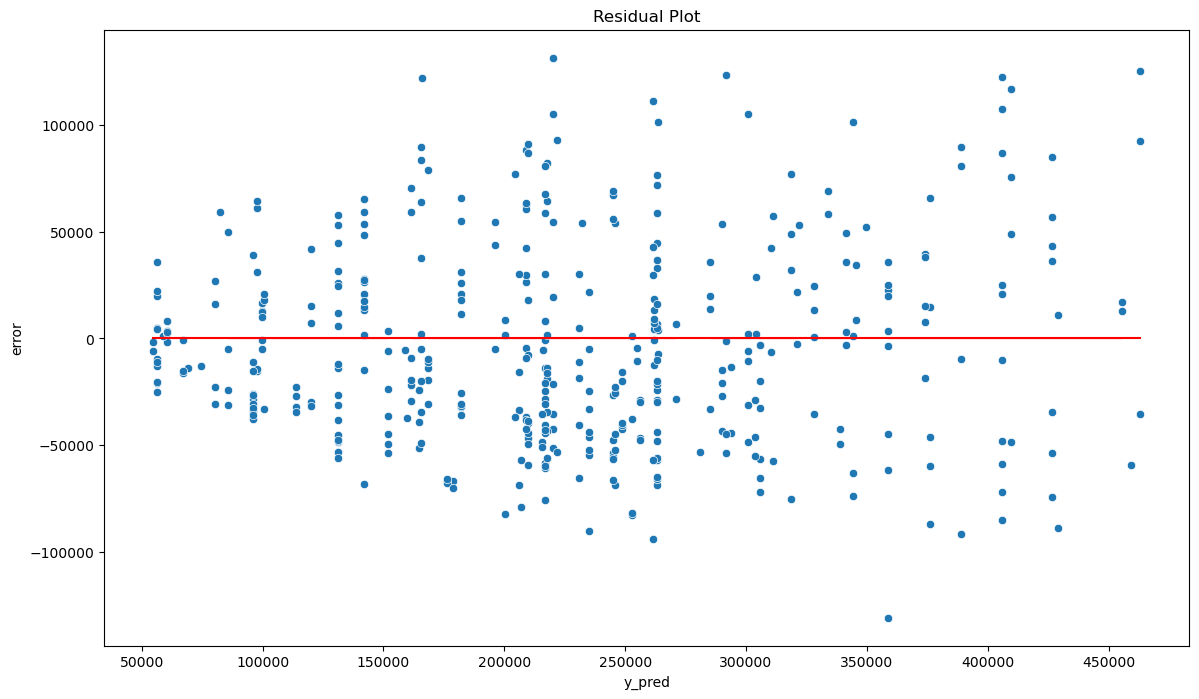

In [116]:
df_error = pd.DataFrame({
    'y_pred':y_pred,
    'error': (y_test - y_pred_xgb_tuning)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

1. Random Distribution of Residuals:
    The residuals are spread randomly around the horizontal line 
    The residuals are spread randomly around the horizontal line y=0, which indicates that the model does not exhibit clear systematic bias.

1. Homoscedasticity:
There seems to be some variation in the spread of residuals. As 
𝑦pred increases, the residuals display slight funneling (wider spread), suggesting potential heteroscedasticity (non-constant variance).

1. Outliers:
    A few points lie significantly far from the horizontal line y=0, which may indicate outliers in the data.

1. Model Performance:
    If the residuals are predominantly close to y=0, the model predictions are fairly accurate. However, the large spread of residuals (both positive and negative) indicates that the model might not be capturing some patterns in the data.

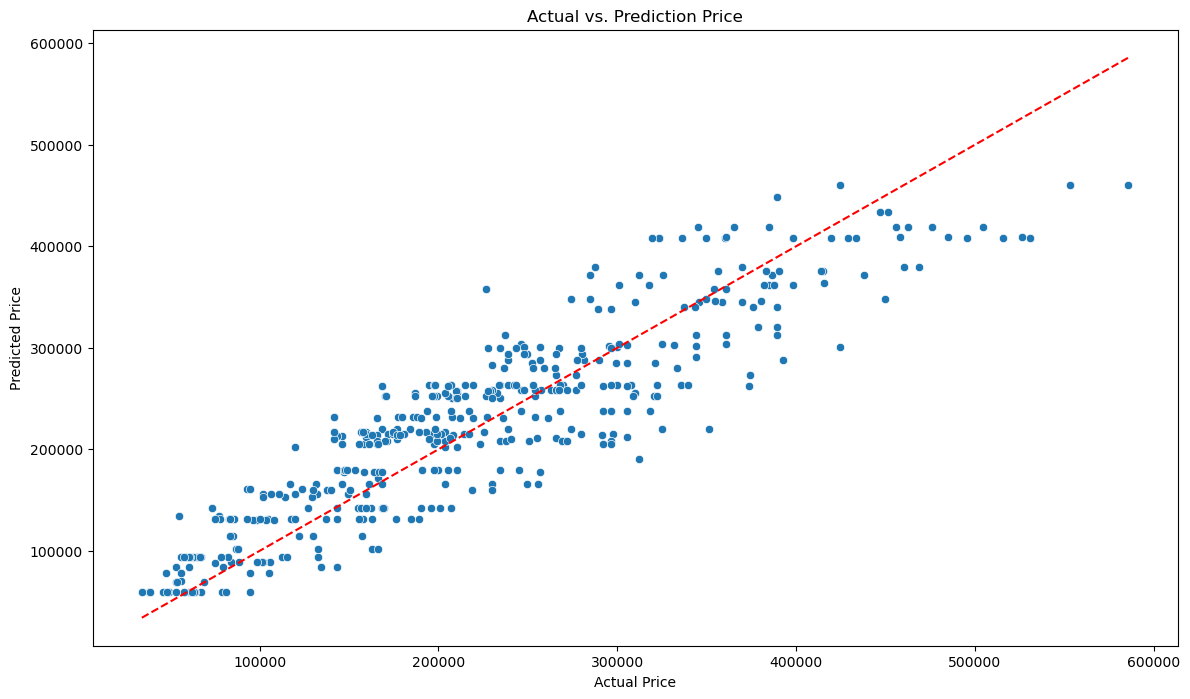

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Create scatter plot
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)

# Plot the line of perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set title and labels
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

1. Alignment with the Diagonal:
    - The dashed red line represents the ideal scenario where predicted values perfectly match the actual values (yactual=ypredicted).
    - Many points lie close to the line, which indicates that the model is performing reasonably well for those cases.        
1. Deviation from the Line:
    - Some points deviate significantly from the red line, showing areas where the model is under-predicting or over-predicting the target variable.
    - These deviations suggest that the model might struggle to generalize for certain data points.
1. Linear Trend:
    - There is a clear linear relationship between actual and predicted values, which is expected in a regression model. However, the spread of points around the line suggests variability in model accuracy.
1. Range of Predictions:
    - The model performs better for lower actual prices, as points are more tightly clustered around the line in this range.
    - For higher actual prices, the predictions are less accurate, with greater deviations from the line

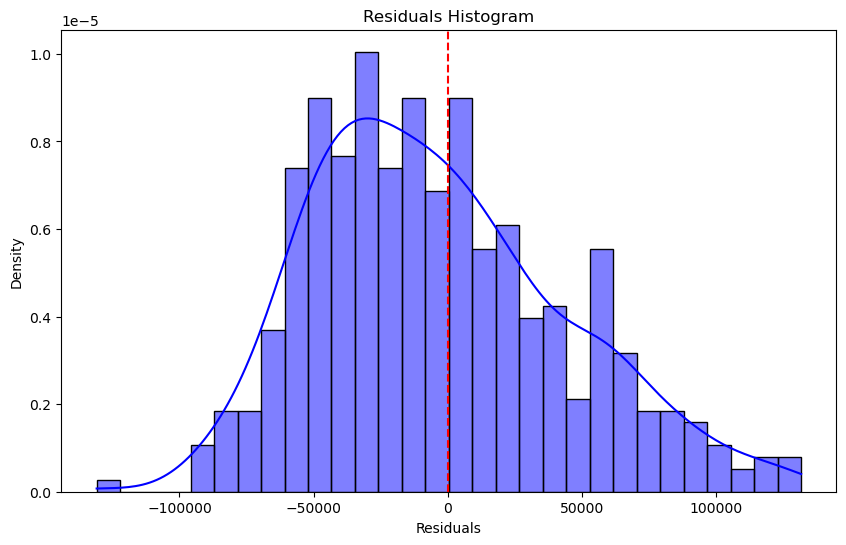

In [118]:
y_residual = y_test - y_pred_xgb_tuning

plt.figure(figsize=(10, 6))
sns.histplot(y_residual, kde=True, bins=30, color='blue', stat="density") 
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.axvline(0, color="red", linestyle="--")
plt.show()

1. Symmetry Around Zero:
    The residuals appear roughly symmetric around zero, which indicates that the model's predictions do not have a systematic bias toward over-prediction or under-prediction.

1. Approximation of Normality:
    The residuals approximately follow a normal distribution, as evidenced by the bell-shaped curve. However, there might be slight deviations from normality, particularly in the tails (potential outliers or extreme values).

1. Spread of Residuals:
    Most residuals are concentrated near zero, suggesting that the model performs well for a majority of the data points. However, some residuals deviate significantly from zero, which may indicate areas where the model struggles to make accurate predictions.

1. Outliers or Extreme Values:
    The presence of residuals in the far left and right tails suggests there are outliers or extreme prediction errors that might require further investigation.

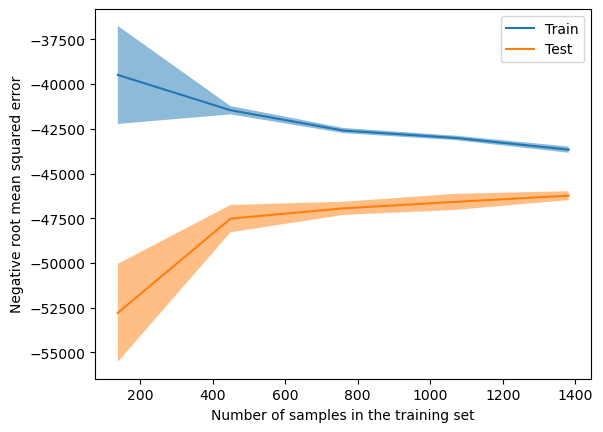

In [119]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(best_model, X_train, y_train, scoring='neg_root_mean_squared_error')

1. Convergence of Training and Test Errors:
    As the number of training samples increases, the training error (blue curve) and test error (orange curve) converge. This indicates that adding more data helps the model generalize better.

1. High Training Error at Larger Sample Sizes:
    The training error slightly increases as the number of training samples grows. This behavior is expected because with more data, the model cannot overfit as easily, leading to a more generalized fit.

1. Improvement in Test Error:
    The test error decreases significantly as the training set size increases, suggesting that the model benefits from more data and performs better on unseen samples.

1. Bias-Variance Tradeoff:
    The convergence of training and test errors implies that the model is neither overfitting nor underfitting. However, the relatively high error suggests that the model might have some inherent bias, which could be due to model simplicity or insufficient feature representation.

1. Saturation Point:
    Beyond approximately 1,000 samples, the errors stabilize, indicating that adding more data may not significantly improve model performance.

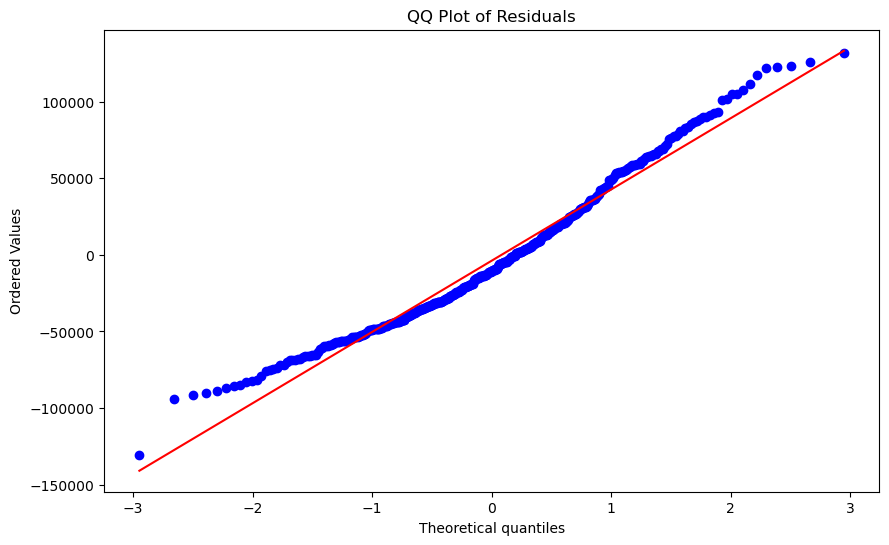

In [120]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(y_residual, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

 Deviation from Normality:

The residuals do not follow the straight red line perfectly, especially at the extreme ends (tails). This suggests that the residuals deviate from a normal distribution. Specifically:
- The lower tail (far left) exhibits negative skewness or heavy tails.
- The upper tail (far right) suggests heavy tails as well.

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

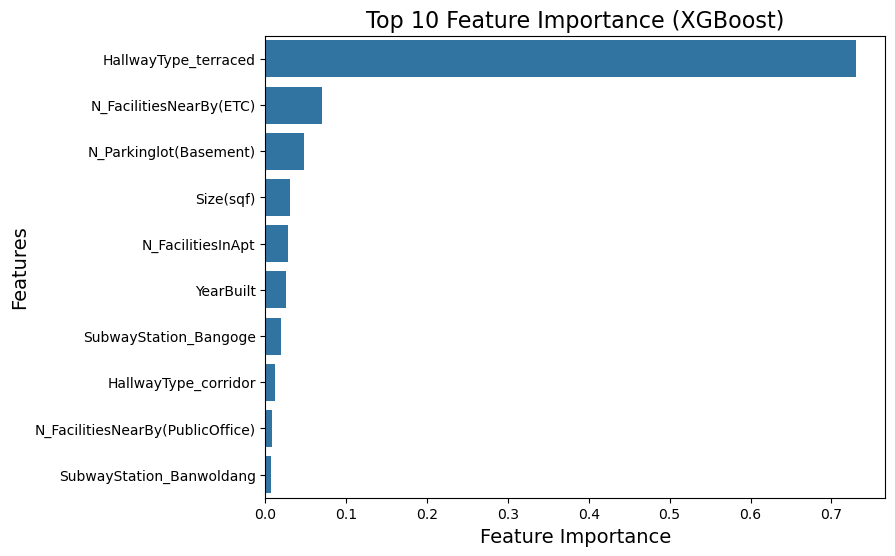

In [121]:
xgb_model = best_model.named_steps['model']

if hasattr(xgb_model, 'regressor_'):
    xgb_model = xgb_model.regressor_

feature_importances = xgb_model.feature_importances_

feature_names = base_transformer.get_feature_names_out()

feature_imp = pd.DataFrame({
    "Features": feature_names,
    "Value": feature_importances
}).sort_values("Value", ascending=False) 

top_10_features = feature_imp.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_10_features, x="Value", y="Features")
plt.title("Top 10 Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

1. Dominant Feature:
    - HallwayType_terraced has the highest importance by a significant margin, suggesting it is the most influential predictor in the model.

1. Secondary Features:
    - The next most important features, such as N_FacilitiesNearBy(ETC) and N_Parkinglot(Basement), have much lower relative importance compared to HallwayType_terraced.
    - These features still contribute to the model but to a much lesser extent.

1. Remaining Features:
    -Features like Size(sqf), N_FacilitiesInApt, and YearBuilt contribute moderately.
    - Features at the lower end, such as SubwayStation_Banwoldang and N_FacilitiesNearBy(PublicOffice), have minimal impact on predictions.

1. Interpretation:
    - The model places a strong focus on HallwayType_terraced, so any changes in this feature are likely to have a significant impact on the predictions.
    - Less important features may still provide complementary information but are less critical.

In [122]:
import shap
shap.initjs()

In [123]:
import shap

model = best_model.named_steps['model'] 
preprocessor = best_model.named_steps['preprocessing'] 

X_train_pre = preprocessor.transform(X_train)
X_train_pre_df = pd.DataFrame(X_train_pre, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(X_test)
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

In [124]:
explainer = shap.TreeExplainer(model=model,
                               data=X_train_pre_df,
                               feature_names=preprocessor.get_feature_names_out) 

In [125]:
shap_values = explainer.shap_values(X_test_pre)

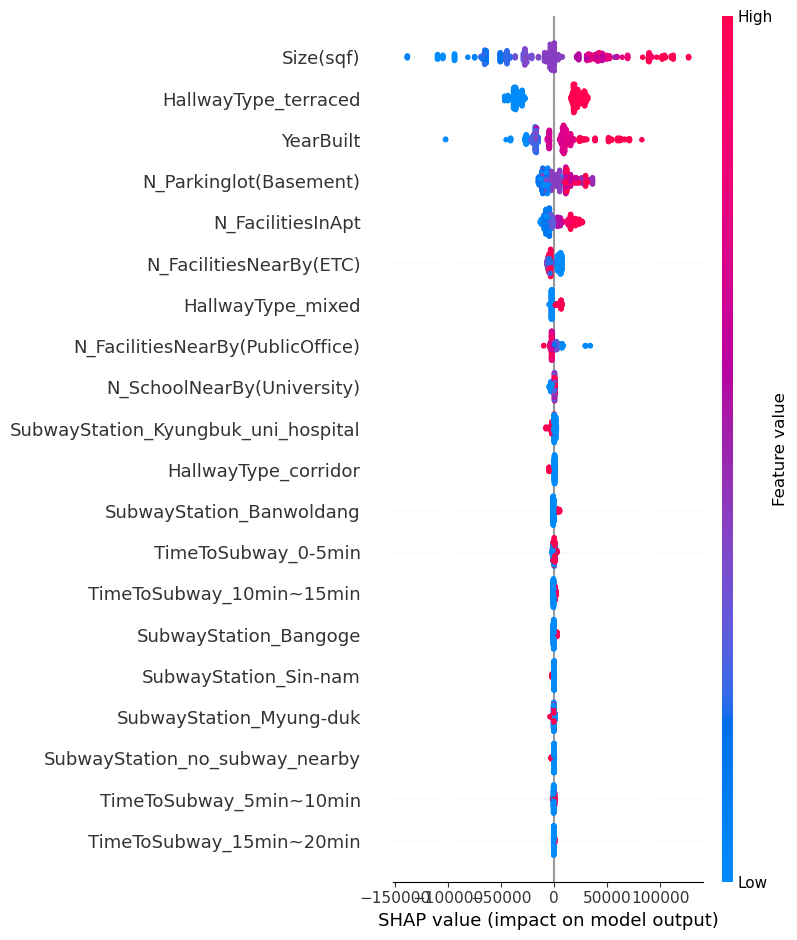

In [126]:
shap.summary_plot(shap_values, X_test_pre_df, feature_names=preprocessor.get_feature_names_out())

1. Feature Importance:
    - Features are ranked by their overall impact on the model output, with Size(sqf) being the most impactful, followed by HallwayType_terraced, YearBuilt, and others.

1. Direction of Impact:
    - The horizontal axis represents the SHAP values, which measure the contribution of a feature to the model's output. Positive SHAP values push the prediction higher, while negative values push it lower.
    - higher Size(sqf) values (shown in pink) tend to increase the prediction, while lower values (in blue) decrease it.

1. Feature Value Encoding:
    - The color gradient represents the feature's actual value. For instance:
        - In Size(sqf), high values (pink) are associated with high positive SHAP values, meaning larger sizes significantly increase the prediction.
        - For HallwayType_terraced, high values (pink) also tend to have a positive impact, while lower values (blue) reduce predictions.

1. Interaction Effects:
    - Some features show variation in their impact (scattered points across the SHAP value range), suggesting possible interactions with other features or non-linear effects.

1. Key Features to Explore:
    - Features like N_Parkinglot(Basement) and YearBuilt have moderate impact. Their SHAP value patterns indicate how certain ranges of these features influence the output.
    - Features like SubwayStation_Banwoldang and TimeToSubway_15min~20min have lower impact but still provide marginal contributions

## **Section 8. Model Deployment**

In [127]:
import pickle

filename = 'XGBoost-v1-46952.sav'
pickle.dump(grid_xgb, open(filename, 'wb'))

In [128]:
xgb_ = pickle.load(open('XGBoost-v1-46952.sav', 'rb'))
xgb_

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('CategoricalPipeline',
                                                                         Pipeline(steps=[('OneHotEncoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                                                        ('NumericalPipeline'...
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 6, 10, 12],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100, 200, 300, 400],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [129]:
X_Dep = df_seen.drop('SalePrice', axis=1)
Y_Dep = df_seen['SalePrice']

print("feature shape: ",X_Dep.shape)
print("target shape: ",Y_Dep.shape)

feature shape:  (2160, 10)
target shape:  (2160,)


In [130]:
xgb_.fit(X_Dep, Y_Dep)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('CategoricalPipeline',
                                                                         Pipeline(steps=[('OneHotEncoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                                                        ('NumericalPipeline'...
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 6, 10, 12],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100, 200, 300, 400],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [131]:
y_pred_dep = xgb_.predict(X_Dep)

rmse_dep = np.sqrt(mean_squared_error(Y_Dep, y_pred_dep))
mae_dep = mean_absolute_error(Y_Dep, y_pred_dep)
mape_dep = mean_absolute_percentage_error(Y_Dep, y_pred_dep)
r2_dep = r2_score(Y_Dep, y_pred_dep) 

score_dep = pd.DataFrame(
    {
    'Model': ['XGB'],
    "RMSE": rmse_dep, 
    "MAE": mae_dep, 
    "MAPE": mape_dep,
    'R²': r2_dep 
    }, index=['Xgb Seen Data'])

score_dep

,Model,RMSE,MAE,MAPE,R²
Xgb Seen Data,XGB,44240.142608,35847.261784,0.18503,0.824315


In [132]:
full_comparison = X_Dep.copy() 
full_comparison["Actual Price"] = Y_Dep 
full_comparison["Potential Price"] = y_pred_dep
full_comparison

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price
2297,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,907,259026,307343.468750
2270,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,914,370796,344046.968750
2469,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1444,283185,364002.812500
1011,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,914,242477,247277.546875
1476,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,743,235398,182163.656250
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1412,386725,300744.031250
1095,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,175221,128547.398438
1130,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,171238,209735.421875
1294,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1483,307079,366562.187500


In [133]:
full_comparison["Price Difference"] = full_comparison["Potential Price"] - full_comparison["Actual Price"]
full_comparison["Percentage Change (%)"] = (full_comparison["Price Difference"] / full_comparison["Actual Price"]) * 100
full_comparison

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price,Price Difference,Percentage Change (%)
2297,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,907,259026,307343.468750,48317.468750,18.653521
2270,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,914,370796,344046.968750,-26749.031250,-7.213948
2469,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1444,283185,364002.812500,80817.812500,28.538875
1011,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,914,242477,247277.546875,4800.546875,1.979795
1476,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,743,235398,182163.656250,-53234.343750,-22.614612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1412,386725,300744.031250,-85980.968750,-22.233103
1095,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,175221,128547.398438,-46673.601562,-26.636991
1130,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,171238,209735.421875,38497.421875,22.481822
1294,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1483,307079,366562.187500,59483.187500,19.370646


In [134]:
bins = [135, 685.5, 1236, 1786.5, 2337] 
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
full_comparison['Size Group'] = pd.cut(full_comparison['Size(sqf)'], bins=bins, labels=labels, include_lowest=True)
group_avg_percentage_change = full_comparison.groupby('Size Group')['Percentage Change (%)'].mean()
full_comparison

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price,Price Difference,Percentage Change (%),Size Group
2297,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,907,259026,307343.468750,48317.468750,18.653521,Group 2
2270,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,914,370796,344046.968750,-26749.031250,-7.213948,Group 2
2469,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1444,283185,364002.812500,80817.812500,28.538875,Group 3
1011,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,914,242477,247277.546875,4800.546875,1.979795,Group 2
1476,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,743,235398,182163.656250,-53234.343750,-22.614612,Group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1412,386725,300744.031250,-85980.968750,-22.233103,Group 3
1095,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,175221,128547.398438,-46673.601562,-26.636991,Group 1
1130,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,171238,209735.421875,38497.421875,22.481822,Group 2
1294,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1483,307079,366562.187500,59483.187500,19.370646,Group 3


In [135]:
group_avg_percentage_change

Size Group
Group 1    8.179133
Group 2    4.068167
Group 3    3.267226
Group 4    3.137946
Name: Percentage Change (%), dtype: float64

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**

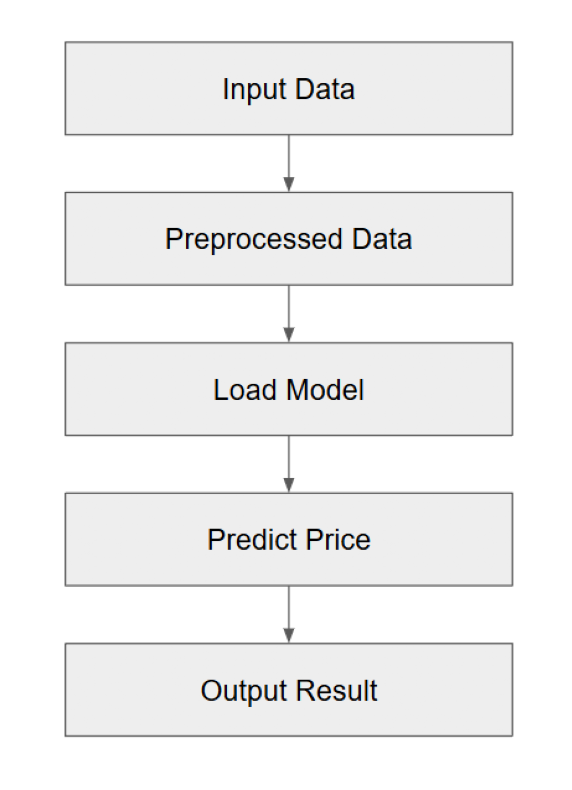

In [136]:
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread(r'C:\Users\user\Desktop\capstone 3\Daegu-Apartement-Price-Predict\assets\Implement New Model Flow Chart.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**9.2 What are the limitations of the model ?**

In [137]:
for feature in numeric_features:
    print(f"The data range for this {feature} is {df[feature].min()} to {df[feature].max()}")

The data range for this N_FacilitiesNearBy(ETC) is 0.0 to 5.0
The data range for this N_FacilitiesNearBy(PublicOffice) is 0.0 to 7.0
The data range for this N_SchoolNearBy(University) is 0.0 to 5.0
The data range for this N_Parkinglot(Basement) is 0.0 to 1321.0
The data range for this YearBuilt is 1978 to 2015
The data range for this N_FacilitiesInApt is 1 to 10
The data range for this Size(sqf) is 135 to 2337
The data range for this SalePrice is 32743 to 585840


- Boundaries and Extrapolation:
    - Feature Limits: The model is trained on data within the specified ranges.
    - Extrapolation Issue: For new data outside these ranges (e.g., an apartment with Size(sqf) of 2,400 or SalePrice above 600,000), the model may perform poorly since it hasn't seen such cases.

**9.3 Business Calculation (Simulation using unseen data)**

In [138]:
X_Imp = df_unseen.drop('SalePrice', axis=1)
Y_Imp = df_unseen['SalePrice']

print("feature shape: ",X_Imp.shape)
print("target shape: ",Y_Imp.shape)

feature shape:  (541, 10)
target shape:  (541,)


In [139]:
xgb_.fit(X_Imp, Y_Imp)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('CategoricalPipeline',
                                                                         Pipeline(steps=[('OneHotEncoding',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['HallwayType', 'TimeToSubway', 'SubwayStation'], dtype='object')),
                                                                        ('NumericalPipeline'...
                         'model__gamma': [0, 0.1, 0.2],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 6, 10, 12],
                         'model__min_child_weight': [1, 3, 5],
                         'model__n_estimators': [100, 200, 300, 400],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [140]:
y_pred_imp = xgb_.predict(X_Imp)

rmse_imp = np.sqrt(mean_squared_error(Y_Imp, y_pred_imp))
mae_imp = mean_absolute_error(Y_Imp, y_pred_imp)
mape_imp = mean_absolute_percentage_error(Y_Imp, y_pred_imp)
r2_imp = r2_score(Y_Imp, y_pred_imp) 

score_imp = pd.DataFrame(
    {
    'Model': ['XGB'],
    "RMSE": rmse_imp, 
    "MAE": mae_imp, 
    "MAPE": mape_imp,
    'R²': r2_imp 
    }, index=['Xgb Unseen Data'])

score_imp


,Model,RMSE,MAE,MAPE,R²
Xgb Unseen Data,XGB,45654.881366,37402.361043,0.188776,0.803782


In [141]:
score_dep['Information'] = 'Seen Data'
score_imp['Information'] = 'Unseen Data'

full_combined_scores = pd.concat([xgb_scores_before_tuning, xgb_score_after_tuning, score_dep, score_imp], ignore_index=True)
full_combined_scores

,Model,RMSE,MAE,MAPE,R²,Information
0,XGB,48077.750074,38687.018944,0.208652,0.805755,Before Tuning
1,XGB,46952.246892,38361.656955,0.206123,0.814743,After Tuning
2,XGB,44240.142608,35847.261784,0.185030,0.824315,Seen Data
3,XGB,45654.881366,37402.361043,0.188776,0.803782,Unseen Data


1. RMSE: ~45,655 → Indicates the model's predictions deviate by ~$45,655 on average.
1. MAE: ~37,402 → The average absolute error is ~$37,402, which is lower than RMSE due to reduced sensitivity to large outliers.
1. MAPE: ~18.88% → The model's predictions deviate by ~18.88% on average relative to the actual apartment prices.

In [142]:
full_comparison_imp = X_Imp.copy() 
full_comparison_imp["Actual Price"] = Y_Imp 
full_comparison_imp["Potential Price"] = y_pred_imp
full_comparison_imp

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price
2050,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,433778,404748.000000
1134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1149,356637,293213.750000
1557,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,201769,205685.187500
332,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1419,371681,302238.843750
1429,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,914,119469,133557.156250
...,...,...,...,...,...,...,...,...,...,...,...,...
2138,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,41061,56751.074219
748,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,163716,194445.921875
891,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,307964,346254.000000
1917,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,2.0,2.0,184.0,2006,5,814,170353,204662.546875


In [143]:
full_comparison_imp["Price Difference"] = full_comparison_imp["Potential Price"] - full_comparison_imp["Actual Price"]
full_comparison_imp["Percentage Change (%)"] = (full_comparison_imp["Price Difference"] / full_comparison_imp["Actual Price"]) * 100
full_comparison_imp

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price,Price Difference,Percentage Change (%)
2050,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,433778,404748.000000,-29030.000000,-6.692363
1134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1149,356637,293213.750000,-63423.250000,-17.783699
1557,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,201769,205685.187500,3916.187500,1.940926
332,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1419,371681,302238.843750,-69442.156250,-18.683268
1429,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,914,119469,133557.156250,14088.156250,11.792311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,41061,56751.074219,15690.074219,38.211622
748,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,163716,194445.921875,30729.921875,18.770262
891,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,307964,346254.000000,38290.000000,12.433271
1917,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,2.0,2.0,184.0,2006,5,814,170353,204662.546875,34309.546875,20.140266


In [144]:
bins = [135, 685.5, 1236, 1786.5, 2337] 
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
full_comparison_imp['Size Group'] = pd.cut(full_comparison_imp['Size(sqf)'], bins=bins, labels=labels, include_lowest=True)
group_avg_percentage_change = full_comparison_imp.groupby('Size Group')['Percentage Change (%)'].mean()
full_comparison_imp

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Actual Price,Potential Price,Price Difference,Percentage Change (%),Size Group
2050,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,433778,404748.000000,-29030.000000,-6.692363,Group 3
1134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1149,356637,293213.750000,-63423.250000,-17.783699,Group 2
1557,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,201769,205685.187500,3916.187500,1.940926,Group 2
332,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1419,371681,302238.843750,-69442.156250,-18.683268,Group 3
1429,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,914,119469,133557.156250,14088.156250,11.792311,Group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,41061,56751.074219,15690.074219,38.211622,Group 1
748,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,163716,194445.921875,30729.921875,18.770262,Group 3
891,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,307964,346254.000000,38290.000000,12.433271,Group 3
1917,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,2.0,2.0,184.0,2006,5,814,170353,204662.546875,34309.546875,20.140266,Group 2


In [145]:
group_avg_percentage_change

Size Group
Group 1    9.054995
Group 2    5.227925
Group 3    3.228563
Group 4    2.071715
Name: Percentage Change (%), dtype: float64

1. **For Sellers:**
    - Group 1 (Small Apartments): Small apartments have a higher discrepancy between predicted and actual prices (9.05%). This indicates that small apartments tend to be underestimated by the model. Sellers of small apartments can increase their asking price by up to 9.05% to match the predicted value, or they can use this information to set a more competitive price compared to market trends.

    - Group 2 (Medium Apartments): The predicted price for medium-sized apartments is closer to the actual market value (5.23%). Sellers can expect modest price increases, but they should keep in mind that the market is relatively competitive. A small price increase (5.23%) may be reasonable to ensure the apartment is priced correctly, especially in areas where medium apartments are in demand.

    - Group 3 (Large Apartments): Large apartments show a smaller discrepancy (3.23%) between predicted and actual prices, meaning the model's predictions are more accurate. Sellers should aim for a price that's close to the model's predicted price and consider slight adjustments if market conditions allow. A modest increase or decrease may be considered based on the property's condition and location.

    - Group 4 (Extra Large Apartments): For very large apartments, the predicted price is quite close to the actual market price (2.07%). Sellers of extra-large apartments should focus on market positioning and may not need to make significant adjustments. However, they should keep in mind that the market for such properties can be more niche, so pricing should reflect both the model's prediction and local market demand.

1. **For Real Estate Agents:**
    - Market Trends and Pricing Strategy: Agents can use these insights to inform pricing strategies for different property sizes. For smaller apartments, agents should advise sellers to consider price increases (up to 9.05%) as the model tends to undervalue them. For larger apartments, agents should aim for less aggressive price changes as the model predictions are already close to actual prices.

    - Negotiation Leverage: Agents can use this information during negotiations. If the predicted price is higher than the listed price, they can highlight this to sellers as an opportunity to raise the price. Conversely, if the model suggests a lower price than the market value, agents can argue for a more competitive price to close a deal faster.

1. **For Buyers:**
    - Opportunity to Negotiate: Buyers can use these insights to assess whether a property is undervalued or overvalued. If a property is priced significantly lower than the model's predicted price (for instance, in Group 1), they may have room to negotiate a lower price. On the other hand, if the model predicts a higher price, they may use this information to negotiate down to a more reasonable price based on the actual market conditions.

    - Market Comparison: Buyers can also compare the predicted price to the actual listed price to get a sense of whether the apartment is fairly priced. If the apartment is in Group 4 (extra-large apartments), they may find that prices are more aligned with the market, and there is less room for negotiation.

- **Overall Strategy Based on Size Group Insights:**

    - Small Apartments (Group 1): Sellers can increase the price, as the model predicts it too low (up to 9.05% more). Buyers may want to push for a lower price based on the model's underestimation.

    - Medium Apartments (Group 2): Slight price increase for sellers is advisable (around 5.23%). Buyers may find it reasonable to negotiate slightly lower if needed.

    - Large Apartments (Group 3): Sellers can price slightly higher or lower than the model's prediction, but the model is already quite accurate. Buyers may have less room for negotiation.

    - Extra Large Apartments (Group 4): Minimal adjustments needed for pricing. The market and predicted prices are quite aligned. Buyers may have fewer opportunities to negotiate.

In [146]:
total_difference = full_comparison_imp['Potential Price'].sum() - full_comparison_imp['Actual Price'].sum()
total_difference

72725.0

we can assume that we will get extra revenue 72.725 won if we use machine learning to predict the price

In [149]:
subsribe_api = 8000 #assumtion in won per month 

net_profit = total_difference - subsribe_api 
net_profit 

64725.0

## **Section 10. Conclusion and Recommendation**

### **10.1 Conclusion**

#### **Conclusion (Model)**

The machine learning model developed for predicting apartment prices using regression (XGBoost) demonstrates strong predictive capabilities, with performance metrics like RMSE, MAE, and MAPE showcasing consistent improvements with model tuning. 

1. **Model Performance**: 
   - The model’s predictions show a significant improvement after tuning, with **RMSE, MAE, and MAPE** values decreasing compared to pre-tuned results, indicating that the model becomes more accurate as hyperparameters are optimized.
   - In the **cross-validation process**, the model maintained a reliable performance with small variations across different metrics, suggesting the model's robustness and its ability to generalize across various data splits.
   - **R2 score** analysis further reinforces the model's strong fit, confirming that the predictions align well with actual values, demonstrating its utility for predicting apartment prices.

2. **Key Insights**:
   - Small apartments (Group 1) tend to have larger prediction errors compared to larger apartments (Group 4), with up to **9.05% price difference** for the smallest apartments. This suggests that the model may have more difficulty in accurately predicting the prices of smaller apartments.
   - Larger apartments are generally predicted more accurately, with price differences decreasing to around **2.07%** for the extra-large apartments, indicating that the model performs better for properties with larger sizes.

#### **Conclusion (Business)**

The machine learning model provides significant value for the real estate business, especially for sellers, agents, and buyers looking to optimize pricing strategies and negotiations.

1. **For Sellers**:
   - The model helps sellers to **set optimal prices** based on accurate predictions. It reveals that sellers of smaller apartments can **increase prices by up to 9.05%** compared to the market, while sellers of larger apartments may need only minor adjustments.
   - By leveraging the model’s predictions, sellers can price their apartments more competitively and accurately, leading to better sales outcomes.
   
2. **For Real Estate Agents**:
   - Real estate agents can use the model to advise sellers on **pricing strategies** and help buyers make more informed decisions. The insights regarding **price discrepancies** for various apartment sizes allow agents to negotiate better deals for their clients.
   - Agents can leverage the **price difference** insights during negotiations, either to push for higher listing prices or to secure better deals for buyers by recognizing undervalued properties.

3. **For Buyers**:
   - Buyers can use the model’s predictions to assess whether a property is priced correctly. **Comparing the model’s predicted price** with the actual asking price can provide them with leverage during negotiations, ensuring they don’t overpay.
   - The model also helps in identifying **undervalued properties**, especially in the case of smaller apartments, where buyers may negotiate better prices based on the predicted market value.

4. **Business Strategy**:
   - **Market Segmentation**: The insights about the pricing adjustments for different apartment sizes suggest that **smaller apartments** may be in a seller’s favor, while **larger apartments** require a more balanced approach. Sellers and agents can tailor their strategies based on this segmentation.
   - **Dynamic Pricing**: The model supports the use of **dynamic pricing**, where the predicted price can be adjusted based on real-time market conditions, demand, and property characteristics.

### **Overall Impact**:
- By integrating the machine learning model into business practices, real estate professionals can make more **data-driven decisions** about pricing, enhance their **negotiation strategies**, and provide **better services to buyers and sellers**.
- This model brings automation and precision to the traditionally subjective process of pricing apartments, improving both the efficiency and effectiveness of real estate transactions.

### **10.2 Recommendation**

#### **Recommendation (Model)**

1. **Model Improvement**:
   - **Feature Engineering**: While the current model performs well, additional features like property age, proximity to key locations (e.g., schools, transportation hubs), or even seasonal trends in pricing could be incorporated to enhance predictions further. Exploring interaction terms between features, such as combining apartment size and location, may uncover hidden patterns that improve model accuracy.
   - **Outlier Detection**: The model could be enhanced by **better handling of outliers**. Properties with extreme values or rare characteristics can sometimes distort predictions. Implementing outlier detection and robust preprocessing techniques can prevent such distortions, improving overall prediction accuracy.

1. **Hyperparameter Optimization**:
   - Continue to explore additional hyperparameter optimization techniques. While grid search and random search have been implemented, leveraging **Bayesian optimization** or **genetic algorithms** might provide even better results for fine-tuning hyperparameters.
   
1. **Real-time Data Integration**:
   - Integrating **real-time data sources** for market prices and other influencing factors (e.g., economic conditions, neighborhood developments) can make the model more dynamic and adaptable to sudden market changes. This can be achieved through APIs or partnerships with real estate data providers.

1. **Model Evaluation on New Data**:
   - Regularly evaluate the model’s performance on new data to ensure it remains accurate and relevant. As market conditions evolve, retraining the model with fresh data will prevent performance degradation over time.

#### **Recommendation (Business)**

1. **Adoption of Predictive Pricing Tools**:
   - **Integrating the Model into Business Operations**: Real estate agencies should integrate the predictive model into their internal systems for dynamic pricing. By providing an accurate estimate of apartment prices, agents can suggest optimal listing prices for sellers, ensuring competitive yet fair pricing.
   - **Real-time Price Adjustments**: For businesses involved in **property investment or management**, the model can be used to adjust rental and sale prices in real-time based on changing market conditions. This ensures that property owners maximize revenue by keeping their prices aligned with the market.

2. **Enhancing Customer Experience**:
   - For **buyers** and **sellers**, providing a price prediction tool powered by the model could enhance the overall customer experience. By giving buyers insight into whether a property is priced fairly and by helping sellers determine a competitive yet realistic price, the business can foster trust and satisfaction with their services.
   
3. **Data-Driven Negotiation**:
   - Real estate agents can leverage the model’s predictions during **price negotiations**. With concrete data backing the suggested prices, agents will have a stronger position during the negotiation process, whether they are representing the buyer or the seller.

4. **Business Intelligence & Reporting**:
   - Use the model to generate **automated reports** for business intelligence. Real-time market analysis and trends extracted from model predictions can guide decision-making in property acquisition, investment strategies, and market expansion.
   - Additionally, **market segmentation insights** (e.g., performance differences across apartment sizes or neighborhoods) can be used to adjust marketing strategies, ensuring that advertisements and promotions are targeted toward the right customer segments.

5. **Targeted Marketing**:
   - Based on the price prediction groups, real estate agencies could focus on **targeted marketing** strategies. For example, properties that are predicted to have a larger potential price increase could be marketed more aggressively, while those that are likely to have smaller price changes may need more incentives (such as discounted pricing or enhanced features).

6. **Continuous Learning and Model Updates**:
   - Implement a strategy for **continuous model retraining**. The real estate market is subject to constant change, so regularly updating the model with new data will ensure its continued relevance and accuracy. This process could be automated to refresh predictions and incorporate new market data dynamically.
   
7. **Strategic Pricing for Different Segments**:
   - **Tailored Pricing Strategy**: Use the groupings (e.g., apartment size groups) to create **segment-based pricing strategies**. For example, focus on higher price increments for smaller apartments where there is a larger predicted difference between the actual and predicted price. Conversely, apply more modest adjustments for larger apartments, where price accuracy is typically higher.

8. **Customer Education and Transparency**:
   - **Education**: Educate clients about how the model works and the benefits it offers. Transparency about pricing strategies and how the model’s predictions are derived will increase trust in the service and foster long-term customer relationships.
   - **Pricing Transparency**: Provide buyers and sellers with breakdowns of how the model estimates prices, helping them understand how factors like size, location, and property features impact the final predictions.

By adopting these recommendations, businesses in the real estate sector can unlock the full potential of the model, leading to better decision-making, improved pricing accuracy, and a more efficient, data-driven operation.